# Exploring the Oncogenic Impact of *TP53* Variants and Classifying the Pathogenicity: A Comprehensive Analysis

___
**Author:** Alison Vaz\
**Date:** 2024-03-15\
**Contact:** alivaz95@gmail.com
___

## <a id='TOC'></a>Table of Contents

1. [Introduction](#Intro)
2. [Data Dictionary](#DD)
3. [Basic EDA](#basiceda)
4. [Preprocessing](#preprocessing)
5. [Visualizations](#visualizations)
6. [Baseline Modeling](#basemodel)

___
## <a id = 'Intro'></a>[Introduction](#TOC)

TP53, a tumor suppressor gene encoding the p53 protein, plays a pivotal role in maintaining genomic stability and preventing the initiation and progression of various cancers. Mutations in TP53 are among the most common genetic alterations observed in human cancers, contributing to tumor development and progression. Understanding the oncogenic impact of TP53 variants is crucial for elucidating their functional consequences and guiding personalized cancer treatment strategies.

This data science project aims to comprehensively analyze the oncogenic impact of TP53 variants and classify their pathogenicity. By leveraging machine learning algorithms and statistical analysis techniques, we seek to identify patterns and relationships within the vast genomic and clinical datasets available. Through this analysis, we aim to:

1. Characterize the spectrum of TP53 variants observed across different cancer types and patient populations.
2. Investigate the functional implications of TP53 mutations on protein structure, function, and downstream signaling pathways.
3. Develop predictive models to classify the pathogenicity of TP53 variants based on diverse genomic features, clinical annotations, and experimental data.
4. Provide insights into the molecular mechanisms underlying TP53-associated tumorigenesis and potential therapeutic vulnerabilities.

By unraveling the complex landscape of TP53 mutations and their oncogenic potential, this project aims to contribute to the advancement of precision oncology and facilitate the development of targeted therapies for cancer patients harboring TP53 alterations. Through interdisciplinary collaboration and data-driven insights, we strive to enhance our understanding of cancer biology and ultimately improve patient outcomes in the era of precision medicine.

___

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
# with warnings.catch_warnings():
#    warnings.simplefilter("ignore")

In [2]:
# Importing the mutation dataset from the TP53Website 
umd_mut = pd.read_excel(r"C:\Users\aliva\Downloads\Capstone\datasets\TP53Website\UMD_mutations_US.xlsx", sheet_name=0)

# Reset the index
umd_mut.reset_index(drop=True, inplace=True)

umd_mut.head()

C:\Users\aliva\anaconda3\Lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Unknown extension is not supported and will be removed
  for idx, row in parser.parse():


## <a id= 'DD'></a>[Data Dictionary](#TOC)

### Mutation Identifiers

| Identifier   | Description                                                                                                  |
|--------------|:--------------------------------------------------------------------------------------------------------------|
| cDNA_Variant | Mutation nomenclature according to HGVS standards using the coding sequence as reference.                   |
| UMD_ID       | Unique mutation identifier in the UMD database for each genomic variant.                                     |
| COSMIC_ID    | Mutation identifier in COSMIC, a comprehensive database of somatic mutations in cancer.                     |
| ATCC         | Official reference available for several cell lines distributed by repository centers.                       |
| SNP_ID*      | Variants of the TP53 gene included in the SNP database, which may encompass pathogenic variants.             |

*SNP_ID refers to variants listed in the SNP database.

### Mutation Coordinates and Nomenclature

| Identifier          | Description                                                                                                                          |
|---------------------|:--------------------------------------------------------------------------------------------------------------------------------------|
| HG19_Start          | Mutation start coordinates using HG19 as reference.                                                                                  |
| HG19_End            | Mutation end coordinates using HG19 as reference.                                                                                    |
| HG18_Start          | Mutation start coordinates using HG18 as reference.                                                                                  |
| HG18_End            | Mutation end coordinates using HG18 as reference.                                                                                    |
| HG38_Start          | Mutation start coordinates using CRCh38 as reference.                                                                                |
| HG38_End            | Mutation end coordinates using CRCH38 as reference.                                                                                  |
| NG_017013.2         | Nucleotide position using NCBI reference sequence NG_0117013.2.                                                                     |
| HG19_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.10 for genome build NCBI37/hg19). |
| HG18_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.9 for genome build NCBI36/hg18).  |
| HG38_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.11 for genome build GRCh38.p2).   |
| NG_017013.2_variant| Mutation nomenclature according to HGVS standards using the RefSeq Gene NG_017013. sequence as reference.                              |
| Start_cDNA          | Mutation start coordinate using the p53 cDNA as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5. |
| End_cDNA            | Mutation end coordinate using the p53 cDNA as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5.   |
| Exon:intron_Start  | Location of the mutation start in the introns or exons of the TP53 gene.                                                              |
| Exon:intron_End    | Location of the mutation end in the introns or exons of the TP53 gene.                                                                |
| Genome_Base_Coding | Nucleotide at the start position of the mutation.                                                                                    |
| cDNA_Variant       | Mutation nomenclature according to HGVS standards using the coding sequence as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5. |


### Mutation Coordinates and Nomenclature

| Identifier          | Description                                                                                                                          |
|---------------------|:-------------------------------------------------------------------------------------------------------------------------------------|
| HG19_Start          | Mutation start coordinates using HG19 as reference.                                                                                  |
| HG19_End            | Mutation end coordinates using HG19 as reference.                                                                                    |
| HG18_Start          | Mutation start coordinates using HG18 as reference.                                                                                  |
| HG18_End            | Mutation end coordinates using HG18 as reference.                                                                                    |
| HG38_Start          | Mutation start coordinates using CRCh38 as reference.                                                                                |
| HG38_End            | Mutation end coordinates using CRCH38 as reference.                                                                                  |
| NG_017013.2         | Nucleotide position using NCBI reference sequence NG_0117013.2.                                                                     |
| HG19_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.10 for genome build NCBI37/hg19). |
| HG18_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.9 for genome build NCBI36/hg18).  |
| HG38_Variant        | Mutation nomenclature according to HGVS standards using the genomic sequence as reference (NC_000017.11 for genome build GRCh38.p2).   |
| NG_017013.2_variant| Mutation nomenclature according to HGVS standards using the RefSeq Gene NG_017013. sequence as reference.                              |
| Start_cDNA          | Mutation start coordinate using the p53 cDNA as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5. |
| End_cDNA            | Mutation end coordinate using the p53 cDNA as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5.   |
| Exon:intron_Start  | Location of the mutation start in the introns or exons of the TP53 gene.                                                              |
| Exon:intron_End    | Location of the mutation end in the introns or exons of the TP53 gene.                                                                |
| Genome_Base_Coding | Nucleotide at the start position of the mutation.                                                                                    |
| cDNA_Variant       | Mutation nomenclature according to HGVS standards using the coding sequence as reference (position 1 refers to the A of the start ATG): reference sequence NM_000546.5. |

### Mutation Details and Amino Acid Changes

| Identifier   | Description                                                                                         |
|--------------|:----------------------------------------------------------------------------------------------------|
| Codon        | Codon position using TP53 alpha (p1) as reference (NP_000537.2).                                   |
| Splice       | Mutations targeting the canonical AG acceptor site or GT donor.                                     |
| Untranslated | Mutations targeting other nucleotides (5'UTR; 3,UTR or Intron).                                    |
| WT AA_1      | Wild-type amino acid in 1-letter nomenclature.                                                      |
| WT AA_3      | Wild-type amino acid in 3-letter nomenclature.                                                      |
| Mutant AA_1  | Mutant amino acid in 1-letter nomenclature.                                                         |
| Mutant AA_3  | Mutant amino acid in 3-letter nomenclature.                                                         |
| Structure    | Structural motif of the TP53 protein according to Cho et al. (1994).                                |
| Domain       | Domain of the TP53 protein.                                                                         |
| PTM          | Post-translational modifications including Lys Acetylation, Lys Ubiquitination, and more.          |

### Mutation Details and Nucleotide Changes

| Identifier        | Description                                                                                                                                                                      |
|-------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Base_Change_Size  | Size of the substitution                                                                                                                                                        |
| Ins_Size          | Size of the deletion                                                                                                                                                            |
| Del_Size          | Size of the insertion; the sequence of the insertion is available for a few cases.                                                                                               |
| Mutant_Allele     | Mutant (Alt) nucleotide                                                                                                                                                         |
| WT_Codon          | Nucleotide sequence of the wild-type codon in which the mutation occurred.                                                                                                      |
| Mutant_Codon      | Sequence of the mutated codon. Del: exonic deletion, Ins: exonic insertion, Indel: complex event that involves an exonic insertion and a deletion. Splice: mutation that targets the canonical AG splice-acceptor site or GT splice-donor site. NR: not relevant, mutations targeting intronic sequence, 5'UTR or 3'UTR. |
| Mutational_Event  | Mutational events                                                                                                                                                               |
| Type              | Ts: Transition (a pyrimidine (C or T) is substituted by another pyrimidine, or a purine (A or G) is substituted by another purine); Tv: Transversion (a transversion mutation involves substitution of a pyrimidine by a purine, or vice versa); Td: tandem mutation; Fr: Frameshift mutations (deletions / insertions); Inf: In-frame deletions or insertions |
| Mutation_Type     | SNV: Single nucleotide variant, D: Deletion, I: insertion, ID: complex event that involves an insertion and a deletion.                                                           |
| CpG               | Yes: transition (G to A or C to T base change) at a CpG dinucleotide; No: transitions (G to A or C to T base change) at non-CpG sites;                                           |

### Pyrimidine-Pyrimidine (Py-Py) Doublets and Tandem Mutations

| Identifier       | Description                                                                                                                                                                       |
|------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Py-Py_Doublets   | Indicates whether or not a mutation targets a Py-Py doublet                                                                                                                        |
|                  | - Yes, non-coding strand: mutation located at a Py-Py doublet on the non-coding strand of the p53 gene                                                                           |
|                  | - Yes, coding strand: mutation located at a Py-Py doublet on the coding strand of the p53 gene                                                                                    |
|                  | - No: mutation located outside a Py-Py doublet                                                                                                                                    |
| Tandem_Class     | The majority of tandem mutations are found in skin tumours.                                                                                                                        |
|                  | Several types of tandem mutations can occur in the open reading frame of the TP53 gene (or any other genes).                                                                     |
|                  | These mutations are considered to be single mutational events linked to UV exposure                                                                                                |
|                  | - T1: two different codons are modified by the substitution.                                                                                                                      |
|                  |    e.g.: codons 247 and 248 of the TP53 gene: AAC - CGG -> AAT- AGG                                                                                                               |
|                  |    c.741_742delCCInsTA (p.[N247N; R248R]                                                                                                                                         |
|                  |    In the majority of T1 tandem mutations, the first substitution does not change the amino acid residue and results in a synonymous change.                                    |
|                  | - T2: only one codon is modified by the substitution.                                                                                                                            |
|                  |    e.g.: codon 331, CAG >CCA.                                                                                                                                                     |
|                  |    c.992_993delAGInsCA (p.Q331P).                                                                                                                                                 |
|                  | - T3: the tandem mutation occurs across a splice site                                                                                                                             |
| Variant_Classification | Translational effect of the mutation (Missense, Nonsense, Synonymous, Nonstop, In_frame_Del, Inframe_Ins, Frameshift_Del, or Frameshift_Ins)                                    |
| Variant_Comment  | Specific comment concerning the consequences of the mutation.                                                                                                                     |
| Variant_Type     | Variant type as defined in MAF file (SNP: Single Nucleotide Variant, DNP: Change in two consecutive bases (dinucleotide polymorphism), TNP: Change in three consecutive bases (tri-nucleotide polymorphism), ONP: Change in four or more consecutive bases (oligo-nucleotide polymorphism), INS: Insertion, DEL: Deletion) |

### Mutation Origin and Sample Information

| Identifier           | Description                                                                                                                                                                 |
|----------------------|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Mutation_Origin      | - Somatic: Somatic mutations. Note: In most cases, only tumour DNA is sequenced and alterations are compared to a reference sequence.                                           |
|                      | - Germline: Inherited TP53 mutation. Note: Common SNPs such as rs1042522 (p.P72R), rs1800371 (p.P47S), rs1800372 (p.R213R), or rs1800370 (p.P36P) are not included in the database. |
| Disease              | Name of the disease as indicated in the publication.                                                                                                                         |
| Sample_pathology     | - Cancer: all types of tumours.                                                                                                                                             |
|                      | - Premalignant diseases: premalignant lesions, such as colorectal adenoma or prostatic intraepithelial neoplasia.                                                             |
|                      | - Non-malignant disease: non-malignant diseases such as gastritis or rheumatoid arthritis that have been shown to be associated with TP53 mutations.                        |
|                      | - No disease: cancer-free individuals with particular features.                                                                                                             |
|                      | - Unknown: sample of unknown origin.                                                                                                                                        |
| Sample_Origin        | Nature of the sample in which the mutation was identified.                                                                                                                  |
|                      | - Adjacent tissue: normal tissue surrounding the tumour.                                                                                                                     |
|                      | - Adjacent tissue (stroma): Stromal cells obtained by microdissection.                                                                                                       |
|                      | - Cell line: self-explanatory.                                                                                                                                              |
|                      | - Circulating tumour cells: DNA extracted from circulating tumour cells.                                                                                                     |
|                      | - Extra cellular DNA: free DNA extracted from sputum, urine, plasma, or serum.                                                                                              |
|                      | - Normal tissue: tissue from cancer-free individuals with particular features.                                                                                                |
|                      | - Pathological tissue: sample from patients with non-malignant disease.                                                                                                      |
|                      | - Peripheral blood lymphocytes: self-explanatory.                                                                                                                            |
|                      | - Tumour: pathological sample from a cancer patient.                                                                                                                         |
|                      | - Xenograft: human tumour transplanted in mice.                                                                                                                              |

### Additional Sample Information

| Identifier            | Description                                                                                                                                                                                                                      |
|-----------------------|:---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Name                  | Name of the tumour/patient/cell line as indicated by the authors. If the publication does not include a sample name, an arbitrary name is assigned, typically the first letters of the author’s last name, followed by numbers.  |
| Hereditary_Syndrome   | Sample from patients with particular hereditary syndromes such as Fanconi anaemia, Li-Fraumeni syndrome, or Xeroderma pigmentosum.                                                                                              |
| Genetic_Background    | Tumours occurring in patients with known germline mutations in other tumour genes that could shape TP53 mutations. Only patients with clear genotype information have been included.                                             |
| Internal              | Internal tumours: all internal tumours. Skin tumour: all skin tumours.                                                                                                                                                          |
| Solid                 | Solid tumour: Non-hematological tumours. Hematological malignancy: all forms of leukemia and lymphomas.                                                                                                                         |
| Smoking               | Information on the patient’s smoking status: Yes, No, Unknown, or Ex-smoker.                                                                                                                                                     |
| Aflatoxin             | Patient’s exposure to Aflatoxin B1: Yes, No, or Unknown.                                                                                                                                                                         |
| Radiations            | Patient’s exposure to radiation: Yes, No, or Unknown.                                                                                                                                                                             |
| Drinking              | Information on the patient’s drinking status: Yes, No, or Unknown.                                                                                                                                                                |
| Asbestos              | Patient’s exposure to asbestos: Yes, No, or Unknown.                                                                                                                                                                              |
| Hepatitis_B           | Detection of HBV in the tumour: Yes, No, or Unknown.                                                                                                                                                                              |
| Papilloma             | Detection of HPV in the tumour: Yes, No, or Unknown.                                                                                                                                                                               |
| Exposure              | Other exposure or viral infection such as Aristolochic acid, radon, or HCV.                                                                                                                                                       |
| Complexity            | SM: Single mutational event in the tumour. DMU (Double Mutation Unknown): Two p53 mutations in the same tumour, but their allelic distribution is unknown. DMD (Double Mutation Different allele): Two p53 mutations in the same tumour on two different p53 alleles. |
|                       | DMS (Double Mutation Same allele): Two p53 mutations in the same tumour on the same p53 allele. MM (Multiple Mutation): More than two p53 mutations in the same tumour.                                                              |
| Unidentified_Mutation | Some mutations identified by pre-screening methodologies, but not fully described, are indicated in this field.                                                                                                                  |

### Mutation Statistics

| Identifier           | Description                                                                                                                                                                  |
|----------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Records_Number       | Number of occurrences of the mutant in the database.                                                                                                                         |
| Leukaemia_Stat       | Frequency of the variant (cDNA_nomenclature) in hematological malignancies.                                                                                                  |
| Solid_Stat           | Frequency of the variant (cDNA_nomenclature) in solid tumours.                                                                                                                |
| Tumour_Stat          | Frequency of the variant (cDNA_nomenclature) in tumours only (excluding variants from cell lines, germline and non-neoplastic diseases).                                    |
| Cell_line_Stat       | Frequency of the variant (cDNA_nomenclature) in cell lines only (excluding variants from tumours, germline and non-neoplastic diseases).                                     |
| Somatic_Stat         | Frequency of the variant (cDNA_nomenclature) found as a somatic event.                                                                                                        |
| Germline_Stat        | Frequency of the variant (cDNA_nomenclature) found as a germline event.                                                                                                       |
| Tumour_Repetition    | Several tumours display more than one mutation. Tumour_rep denotes the total number of mutations associated with this mutant in a single tumour.                             |
| Publication_Repetition | Number of occurrences of this particular mutant in the publication.                                                                                                            |
| Comment_Prediction   | Several prediction algorithms have been used to predict TP53 pathogenicity (SIFT, Mutassessor, Provean, PolyPhen, see the corresponding rows for each individual analysis). |
| Comment_Frequency    | Specific information related to the frequency of the mutation in the database.                                                                                                |
### Additional Mutation Comments

| Identifier         | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                      |
|--------------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Comment_Outliers   | Indicates whether or not the mutation is associated with outlier publications. Rare mutants only found in outlier studies should be considered to be suspicious.                                                                                                                                                                                                                                                                                             |
| Comment_Activity   | Specific information related to the residual activity of this TP53 mutant in the database based on the overall transcriptional activity (TA) on 8 different promoters. For missense variants, five categories have been defined. For nonsense variants, one category has been used. For frameshift variants, two categories have been used. For synonymous variants, two categories have been used. For mutations that target the canonical AG splice-acceptor site or GT splice-donor site, a separate category is used. |
| Comment_Splicing   | Indicates whether or not a mutation could impair TP53 splicing. For exonic mutation, MutPred Splice general score probability cutoff and raw data are provided. For intronic mutation, only mutations that target the canonical AG splice-acceptor site or GT splice-donor site are considered to be pathogenic.                                                                                                                                                   |
| Sift_Score         | Predicted functional effect using SIFT algorithm. Ranges from 0 to 1. The amino acid substitution is predicted to be damaging when the score is <= 0.05, and tolerated when the score is > 0.05.                                                                                                                                                                                                                                                             |
| Sift_Prediction    | Predictive value using SIFT algorithm.                                                                                                                                                                                                                                                                                                                                                                                                                           |
| Provean_Score      | Predicted functional effect using PROVEAN algorithm. PROVEAN introduces a delta alignment score based on the reference and variant versions of a protein query sequence with respect to sequence homologues collected from the NCBI NR protein database through BLAST.                                                                                                                                                                              |
| Provean_prediction | Prediction - deleterious or neutral (using default cutoff at -2.5).                                                                                                                                                                                                                                                                                                                                 |
| Mutassessor_score  | Predicted functional effect using Mutassessor algorithm. Functional impact combined score.                                                                                                                                                                                                                                                                                                                                                                      |
| Mutassessor_prediction | Functional impact of a variant: predicted functional (high, medium), predicted non-functional (low, neutral).                                                                                                                                                                                                                                                                                                                                                 |
| Polyphen           | Predicted functional effect using Polyphen algorithm. Qualitative ternary classification appraised at 5%/10% (HumDiv) or 10%/20% (HumVar) FPR thresholds ("benign", "possibly damaging", "probably damaging").                                                                                                                                                                                                                                                     |
### Additional Mutation Comments

| Identifier              | Description                                                                                                                                                                                                                   |
|-------------------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Condel                  | Predicted functional effect using Condel algorithm.                                                                                                                                                                           |
| MutPred_Splice_General_Score | The MutPred Splice outputs are: 1. General Score, which is the probability that the exonic variant disrupts splicing. A general score >=0.6 labels a variant as a Splice Affecting Variant (SAV), and <0.6 labels a variant as a Splice Neutral Variant (SNV). 2. Additional supporting evidence is provided by a confident hypothesis about the splicing mechanism disrupted. |
| Prediction_Label        | See MutPred Splice documentation for details.                                                                                                                                                                                 |
| Confident_Hypotheses    | See MutPred Splice documentation for details.                                                                                                                                                                                 |
### Transcript and Protein Nomenclature

| Identifier               | Description                                                                                                    |
|--------------------------|:---------------------------------------------------------------------------------------------------------------|
| Transcript t1            | Mutation nomenclature and coordinates for transcript t1 using reference sequence NM_000546.5 or LRG_321t1    |
| Transcript t2            | Mutation nomenclature and coordinates for transcript t2 using reference sequence NM_001126112.2 or LRG_321t2 |
| Transcript t3            | Mutation nomenclature and coordinates for transcript t3 using reference sequence NM_001126114.2 or LRG_321t3 |
| Transcript t4            | Mutation nomenclature and coordinates for transcript t4 using reference sequence NM_001126113.2 or LRG_321t4 |
| Transcript t5            | Mutation nomenclature and coordinates for transcript t5 using reference sequence NM_001126115.1 or LRG_321t5 |
| Transcript t6            | Mutation nomenclature and coordinates for transcript t6 using reference sequence NM_001126116.1 or LRG_321t6 |
| Transcript t7            | Mutation nomenclature and coordinates for transcript t7 using reference sequence NM_001126117.1 or LRG_321t7 |
| Transcript t8            | Mutation nomenclature and coordinates for transcript t8 using reference sequence NM_001126118.1 or LRG_321t8 |
| Protein p1 (TP53_alpha) | Mutation nomenclature and coordinates for protein p1 using reference sequence NP_000537.3 or LRG_321p1       |
| Protein p3 (TP53_beta)  | Mutation nomenclature and coordinates for protein p3 using reference sequence NP_001119586.1 or LRG_321p3    |
| Protein p4 (TP53_gamma) | Mutation nomenclature and coordinates for protein p4 using reference sequence NP_001119585.1 or LRG_321p4    |
| Protein p8 (Delta_40_TP53)         | Mutation nomenclature and coordinates for protein p8 using reference sequence NP_001263690.1 or LRG_321p8    |
| Protein p9 (Delta_40_TP53_beta)    | Mutation nomenclature and coordinates for protein p9 using reference sequence NP_001263625.1 or LRG_321p9    |
| Protein p10 (Delta_40_TP53_gamma)  | Mutation nomenclature and coordinates for protein p10 using reference sequence NP_001263624.1 or LRG_321p10 |
| Protein p5 (Delta_133_TP53_alpha)  | Mutation nomenclature and coordinates for protein p5 using reference sequence NP_001119587.1 or LRG_321p5    |
| Protein p6 (Delta_133_TP53_beta)   | Mutation nomenclature and coordinates for protein p6 using reference sequence NP_001119588.1 or LRG_321p6    |
| Protein p7 (Delta_133_TP53_gamma)  | Mutation nomenclature and coordinates for protein p7 using reference sequence NP_001119589.1 or LRG_321p7    |
| Protein p11 (Delta_160_TP53_alpha) | Mutation nomenclature and coordinates for protein p11 using reference sequence NP_001263626.1 or LRG_321p11  |
| Protein p12 (Delta_160_TP53_beta)  | Mutation nomenclature and coordinates for protein p12 using reference sequence NP_001263627.1 or LRG_321p12  |
| Protein p13 (Delta_160_TP53_gamma) | Mutation nomenclature and coordinates for protein p13 using reference sequence NP_001263628.1 or LRG_321p13 |

### Mutant Activity

| Identifier    | Description                                                                                          |
|---------------|:-----------------------------------------------------------------------------------------------------|
| WAF1          | Residual transcriptional activity of mutant p53 on the WAF1 promoter (% compared to wild-type p53). |
| MDM2          | Residual transcriptional activity of mutant p53 on the MDM2 promoter (% compared to wild-type p53). |
| BAX           | Residual transcriptional activity of mutant p53 on the BAX promoter (% compared to wild-type p53).  |
| 14_3_3_s      | Residual transcriptional activity of mutant p53 on the 14-3-3-s promoter (% compared to wild-type p53). |
| AIP           | Residual transcriptional activity of mutant p53 on the AIP promoter (% compared to wild-type p53).   |
| GADD45        | Residual transcriptional activity of mutant p53 on the GADD45 promoter (% compared to wild-type p53).|
| NOXA          | Residual transcriptional activity of mutant p53 on the NOXA promoter (% compared to wild-type p53).  |
| p53R2         | Residual transcriptional activity of mutant p53 on the p52R2 promoter (% compared to wild-type p53). |

### Mutation Transcripts and Protein Nomenclature

| Identifier                   | Description                                                                                                                                                                    |
|------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Transcript t1 - t8          | Mutation nomenclature and coordinates described according to HGVS, NCBI, and LRG for different transcripts of TP53 gene.                                                     |
| Protein p1 - p13            | Mutation nomenclature and coordinates described according to HGVS, NCBI, and LRG for different protein isoforms of TP53 gene.                                                  |

### Mutant Activity

| Identifier                   | Description                                                                                                                                                                    |
|------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Mutant activities (mutant) | Residual transcriptional activity of mutant p53 on various promoters (% compared to wild-type p53). Data taken from the publication by Kato et al.                             |
| WAF1                         | Residual transcriptional activity of mutant p53 on the WAF1 promoter (% compared to wild-type p53).                                                                           |
| MDM2                         | Residual transcriptional activity of mutant p53 on the MDM2 promoter (% compared to wild-type p53).                                                                           |
| BAX                          | Residual transcriptional activity of mutant p53 on the BAX promoter (% compared to wild-type p53).                                                                            |
| 14_3_3_s                     | Residual transcriptional activity of mutant p53 on the 14-3-3-σ promoter (% compared to wild-type p53).                                                                       |
| AIP                          | Residual transcriptional activity of mutant p53 on the AIP promoter (% compared to wild-type p53).                                                                            |
| GADD45                       | Residual transcriptional activity of mutant p53 on the GADD45 promoter (% compared to wild-type p53).                                                                         |
| NOXA                         | Residual transcriptional activity of mutant p53 on the NOXA promoter (% compared to wild-type p53).                                                                           |
| p53R2                        | Residual transcriptional activity of mutant p53 on the p52R2 promoter (% compared to wild-type p53).                                                                         |

### Reference Information

| Identifier                   | Description                                                                                                                                                                    |
|------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Reference ID                 | Reference identification number.                                                                                                                                               |
| Authors                      | Authors of the publication.                                                                                                                                                   |
| Year                         | Year of publication.                                                                                                                                                           |
| Title                        | Title of the publication.                                                                                                                                                      |
| Journal                      | Name of the journal where the publication is published.                                                                                                                        |
| Volume                       | Volume number of the journal.                                                                                                                                                 |
| Page(s)                      | Page numbers of the publication.                                                                                                                                              |
| Medline                      | Medline reference for the publication.                                                                                                                                         |

### Outliers

| Identifier                   | Description                                                                                                                                                                    |
|------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Act_Outliers                 | Indicates whether the mutation is associated with outlier publications based on residual activity of TP53 mutants.                                                             |
| PCA_Outliers                 | Indicates whether the publication is considered an outlier based on multicriteria analysis using data-driven methodologies.                                                    |
| PCA_Score                    | Score used for filtering high confidence reports within the database based on multicriteria analysis.                                                                          |
| Comment_7_Sequence           | Specific information about homopolymeric tracts in the TP53 gene.                                                                                                               |
| Commrnt_8_Publication        | Specific information regarding this mutation and the publication.                                                                                                               |
| Comment_9_SNP                | Specific comments regarding the specificity of each SNP including novel SNP detected in new sequencing projects.                                                              |
| General Comment              | Specific information regarding this mutation and/or the publication.                                                                                                            |

### Pathogenicity (Target feature)

| Identifier                   | Description                                                                                                                                                                    |
|------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Pathogenicity                | Standard terminology for TP53 variants: ‘pathogenic’, ‘likely pathogenic’, ‘uncertain significance’ (VUS), ‘likely benign’.       |

## <a id= 'basiceda'></a>[Basic EDA](#TOC)

In [3]:
umd_mut.shape

(80406, 133)

In [4]:
umd_mut.duplicated().sum()

0

In [6]:
#umd_mut.T.duplicated().sum()

0

In [7]:
umd_mut.describe()

,Database_ID,Unidentified_Mutations,Records_Number,Leukemia_Stat,Solid_Stat,Tumor_Stat,Cell_line_Stat,Somatic_Stat,Germline_Stat,Tumor_Repetition,Publication_Repetition,ReferenceID,Year,PCA_Score
count,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000,80406.000000
mean,40203.658521,0.004129,617.785140,0.701378,0.776156,0.772338,0.817065,0.767926,0.794793,1.299356,2.677611,2914.353655,2009.100838,0.591724
std,23211.588254,0.073353,948.298658,1.146366,1.194027,1.184317,1.325399,1.177334,1.401777,1.195417,5.183814,1264.995953,7.684373,1.201143
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1985.000000,0.000000
25%,20102.250000,0.000000,28.000000,0.027000,0.033000,0.034000,0.000000,0.034000,0.000000,1.000000,1.000000,1965.000000,2003.000000,0.108000
50%,40203.500000,0.000000,142.000000,0.149000,0.178000,0.177000,0.181000,0.179000,0.083000,1.000000,1.000000,3097.000000,2012.000000,0.252000
75%,60304.750000,0.000000,649.000000,0.716000,0.852000,0.820000,0.802000,0.808000,0.911000,1.000000,2.000000,4049.000000,2015.000000,0.538000
max,80407.000000,4.000000,3428.000000,4.674000,4.406000,4.328000,4.995000,4.260000,4.636000,23.000000,75.000000,4629.000000,2017.000000,10.342000


In [8]:
# Getting the object columns
object_columns = umd_mut.dtypes[umd_mut.dtypes == 'object']

In [9]:
object_columns

UMD_ID                   object
COSMIC_ID                object
ATCC                     object
SNP_ID                   object
HG19_Start               object
                          ...  
Comment_7_Sequence       object
Comment_8_publication    object
Comment_9_SNP            object
Comments                 object
Pathogenicity            object
Length: 119, dtype: object

In [10]:
# Getting the numeric columns
integer_columns = umd_mut.dtypes[umd_mut.dtypes == 'int64']

In [11]:
integer_columns

Database_ID               int64
Unidentified_Mutations    int64
Records_Number            int64
Tumor_Repetition          int64
Publication_Repetition    int64
ReferenceID               int64
Year                      int64
dtype: object

In [12]:
float_columns = umd_mut.dtypes[umd_mut.dtypes == 'float64']

In [13]:
float_columns

Leukemia_Stat     float64
Solid_Stat        float64
Tumor_Stat        float64
Cell_line_Stat    float64
Somatic_Stat      float64
Germline_Stat     float64
PCA_Score         float64
dtype: object

In [14]:
for col in umd_mut.columns:
    print(f"Column: {col}")
    print(umd_mut[col].value_counts())
    print()

Column: Database_ID
Database_ID
67805    1
60092    1
21914    1
47827    1
60096    1
        ..
25544    1
35135    1
4058     1
24152    1
66373    1
Name: count, Length: 80406, dtype: int64

Column: UMD_ID
UMD_ID
UMD_3113    3428
UMD_4903    2562
UMD_5583    2361
UMD_5576    2214
UMD_4895    2003
            ... 
UMD_183        1
UMD_6076       1
UMD_1919       1
UMD_3773       1
UMD_6023       1
Name: count, Length: 6870, dtype: int64

Column: COSMIC_ID
COSMIC_ID
COSM10648      3428
COSM10662      2562
COSM10660      2361
COSM10659      2214
COSM10656      2003
               ... 
COSM45774         1
COSM45710         1
COSM44082         1
COSM45693         1
COSM5387432       1
Name: count, Length: 1710, dtype: int64

Column: ATCC
ATCC
HTB-81      15
CCL-119     12
TIB-152     11
CCL-86      10
CCL-227      8
            ..
CRL-5850     1
CRL-7477     1
CRL-2964     1
HTB-54       1
CRL-2808     1
Name: count, Length: 321, dtype: int64

Column: SNP_ID
SNP_ID
rs28934578     3502
r

Type
Ts     45869
Tv     24852
Fr      7324
InF     1596
Td       765
Name: count, dtype: int64

Column: Mutation_Type
Mutation_Type
B     70721
D      6757
I      1968
ID      960
Name: count, dtype: int64

Column: CpG
CpG
No     58927
Yes    21419
NR        60
Name: count, dtype: int64

Column: Py_Py_Doublets
Py_Py_Doublets
No                       36514
Yes_non_coding_strand    23080
Yes_coding_strand        20803
Name: count, dtype: int64

Column: Tandem_Class
Tandem_Class
T2      467
T1sm    151
T1sx     59
T1mm     39
T1mx     12
T1se     11
T1em      8
T3        4
T1me      3
T1xx      2
t1sm      2
T1xm      1
T1ms      1
T1ss      1
T1ex      1
T1ee      1
t1mm      1
t1sx      1
Name: count, dtype: int64

Column: Variant_Classification
Variant_Classification
Missense_Mutation                       58517
Nonsense_Mutation                        8460
Frame_Shift_Del                          5212
Splice_Site                              2348
Synonymous_Mutation                  

Hepatitis_B
Unknown    80288
Yes           83
No            30
HBV            5
Name: count, dtype: int64

Column: Papilloma
Papilloma
Unknown    80063
No           250
Yes           93
Name: count, dtype: int64

Column: Exposure
Exposure
Unknown                  79989
Aristolochic Acid          133
Thorotrast                  81
Wood dust                   45
Aristolochic acid           43
Asbestos                    21
HIV                         18
Smoky coal                  14
HTLV-1                      12
Ionizing radiation          12
HCV                         11
Betel nut consumption        8
Radiotherapy                 5
Uranium                      4
Radon                        3
EBV                          3
Vinyl chloride               2
Arsenic                      1
SV40                         1
Name: count, dtype: int64

Column: Complexity
Complexity
SM     67271
DMU     9415
MM      3565
DMD      121
DMS       34
Name: count, dtype: int64

Column: Unidentified_Mu

MutPred_Splice_General_Score
No data    20532
0.139       3448
0.181       2716
0.306       2374
0.808       2215
           ...  
0.636          1
0.772          1
0.548          1
0.114          1
0.959          1
Name: count, Length: 560, dtype: int64

Column: Prediction_Label
Prediction_Label
Splice Neutral Variant (SNV)      54423
No data                           20532
Splice Affecting Variant (SAV)     5451
Name: count, dtype: int64

Column: Confident__Hypotheses
Confident__Hypotheses
Not relevant                                             54423
No data                                                  20532
Cryptic 5' SS (P = 0.013817)                              2214
No confident hypotheses                                   1553
Loss of natural 5' SS (P < 0.000001)                       500
                                                         ...  
Cryptic 5' SS (P = 0.015236)                                 1
Cryptic 5' SS (P = 0.001474)                                 1

PCA_Score
0.000    16503
0.559      902
0.235      862
0.173      835
0.193      797
         ...  
0.615        5
0.548        5
1.347        5
2.293        5
0.999        5
Name: count, Length: 1109, dtype: int64

Column: Comment_7_Sequence
Comment_7_Sequence
-                                                     76053
This region contains a homopolymeric tract of 5 G      2062
This region contains a homopolymeric tract of 4 G      1086
This region contains a homopolymeric tract of 4 A       513
This region contains a homopolymeric tract of 4 C       356
This region contains a homopolymeric tract of 6 G       171
This region contains a homopolymeric tract of 4 T        72
This region contains a homopolymeric tract of 6 C        42
This region contains a homopolymeric tract of 6 T        38
This region contains a homopolymeric tract of 5 T         7
This region contains a homopolymeric tract of 18 T        5
This region contains a homopolymeric tract of 19 A        1
Name: count, dtype

In [15]:
for col in umd_mut.columns:
    nan_count = umd_mut[col].isna().sum()
    print(f"NaN count in column '{col}': {nan_count}")

NaN count in column 'Database_ID': 0
NaN count in column 'UMD_ID': 0
NaN count in column 'COSMIC_ID': 11491
NaN count in column 'ATCC': 79361
NaN count in column 'SNP_ID': 43626
NaN count in column 'HG19_Start': 0
NaN count in column 'HG19_End': 0
NaN count in column 'HG18_Start': 0
NaN count in column 'HG18_End': 0
NaN count in column 'HG38_Start': 0
NaN count in column 'HG38_End': 0
NaN count in column 'NG_017013.2': 0
NaN count in column 'HG19_Variant': 0
NaN count in column 'HG18_Variant': 0
NaN count in column 'HG38_Variant': 0
NaN count in column 'NG_017013.2_Variant': 0
NaN count in column 'Start_cDNA': 0
NaN count in column 'End_cDNA': 0
NaN count in column 'Exon:intron_start': 0
NaN count in column 'Exon:intron_End': 0
NaN count in column 'Genome_base_coding': 0
NaN count in column 'cDNA_variant': 0
NaN count in column 'Codon': 0
NaN count in column 'WT_AA_1': 0
NaN count in column 'WT_AA_3': 0
NaN count in column 'Mutant_AA_1': 0
NaN count in column 'Mutant_AA_3': 0
NaN count

In [16]:
for col in umd_mut.columns:
    print(f'{col}')

Database_ID
UMD_ID
COSMIC_ID
ATCC
SNP_ID
HG19_Start
HG19_End
HG18_Start
HG18_End
HG38_Start
HG38_End
NG_017013.2
HG19_Variant
HG18_Variant
HG38_Variant
NG_017013.2_Variant
Start_cDNA
End_cDNA
Exon:intron_start
Exon:intron_End
Genome_base_coding
cDNA_variant
Codon
WT_AA_1
WT_AA_3
Mutant_AA_1
Mutant_AA_3
Structure
Domain
PTM
Base_Change_Size
Ins_Size
Del_Size
Mutant_Allele
Wt_Codon
Mutant_Codon
Mutational_event
Type
Mutation_Type
CpG
Py_Py_Doublets
Tandem_Class
Variant_Classification
Variant Comment
Variant_Type
Mutation_origin
Disease
Sample_pathology
Sample_origin
Name
Hereditary_syndrome
Genetic_Background
Internal
Solid
Smoking
Aflatoxin
Radiations
Drinking
Asbestos
Hepatitis_B
Papilloma
Exposure
Complexity
Unidentified_Mutations
Records_Number
Leukemia_Stat
Solid_Stat
Tumor_Stat
Cell_line_Stat
Somatic_Stat
Germline_Stat
Tumor_Repetition
Publication_Repetition
Comment prediction
Comment frequency
Comment outliers
Comment activity
Comment splicing
Sift Score
Sift Prediction
Provean_Sc

## <a id = 'preprocessing'></a>[Preprocessing](#TOC)

In [64]:
# Selecting the columns to be kept
columns_to_keep = [
    'HG38_Start', 'HG38_End', 'Exon:intron_start', 'Exon:intron_End',
    'Genome_base_coding', 'Mutant_Allele', 'Codon', 
    'WT_AA_3', 'Mutant_AA_3', 'Wt_Codon', 'Mutant_Codon', 'Structure', 'Domain', 
    'Base_Change_Size', 'Ins_Size', 'Del_Size',
    'Type', 'Mutation_Type', 'CpG', 'Py_Py_Doublets', 'Variant_Type',
    'Mutation_origin', 'Disease', 'Sample_pathology', 'Sample_origin',
    'Records_Number', 'Leukemia_Stat', 'Solid_Stat', 'Tumor_Stat',
    'Cell_line_Stat', 'Somatic_Stat', 'Germline_Stat',
    'Comment activity', 'Comment prediction', 'Comment frequency', 
    'Sift Prediction', 'Provean_prediction', 'Mutassessor_prediction:',
    'Prediction_Label', 'Tumor_Repetition', 'Pathogenicity'
]

# Selecting only the desired columns
umd_mut_df = umd_mut[columns_to_keep]


In [18]:
umd_mut_df.shape

(80406, 43)

In [19]:
umd_mut_df.head()

,HG38_Start,HG38_End,Start_cDNA,End_cDNA,Exon:intron_start,Exon:intron_End,Genome_base_coding,Mutant_Allele,Codon,WT_AA_3,...,Germline_Stat,Comment activity,Comment prediction,Comment frequency,Sift Prediction,Provean_prediction,Mutassessor_prediction:,Prediction_Label,Tumor_Repetition,Pathogenicity
0,7675167,7675167,445,445,5,5,T,NaN,149,Ser,...,0.000,The activity of truncated p53 is assumed to be...,No prediction for frameshift mutation,This frameshift variant is very frequent,No data (Frameshift),No data (Frameshift),No data (Frameshift),No data,1,Likely Pathogenic
1,7675156,7675156,456,456,5,5,G,G,152,Pro,...,0.000,The activity of truncated p53 is assumed to be...,No prediction for frameshift mutation,This frameshift variant is frequent,No data (Frameshift),No data (Frameshift),No data (Frameshift),No data,1,Likely Pathogenic
2,7674181,7674181,782,782,7,7,G,A,261,Ser,...,0.000,Fully active,Tolerated,This single nucleotide variant is rare,Tolerated,Neutral,neutral,Splice Affecting Variant (SAV),1,VUS
3,?,?,?,?,?,?,?,?,?,NR,...,0.331,No protein,No prediction for frameshift mutation,This frameshift variant is very frequent,No data (no protein),No data (no protein),No data (no protein),No data,1,Pathogenic
4,7673803,7673803,817,817,8,8,C,T,273,Arg,...,1.407,Inactive,Damaging,This single nucleotide variant is very frequent,Damaging,Deleterious,Medium,Splice Affecting Variant (SAV),1,Pathogenic


In [65]:
umd_mut_df[umd_mut_df.eq('?', axis=0).any(axis=1)]

,HG38_Start,HG38_End,Exon:intron_start,Exon:intron_End,Genome_base_coding,Mutant_Allele,Codon,WT_AA_3,Mutant_AA_3,Wt_Codon,...,Germline_Stat,Comment activity,Comment prediction,Comment frequency,Sift Prediction,Provean_prediction,Mutassessor_prediction:,Prediction_Label,Tumor_Repetition,Pathogenicity
3,?,?,?,?,?,?,?,NR,Fr,?,...,0.331,No protein,No prediction for frameshift mutation,This frameshift variant is very frequent,No data (no protein),No data (no protein),No data (no protein),No data,1,Pathogenic
2810,7673534,7670705,Intron_09_SD,10,G,?,Splice,p.?,Fr,Intron_09_SD,...,0.000,This deletion removes a splice junction ; TP53...,No prediction for frameshift mutation,This frameshift variant is unique,No data (Splice),No data (Splice),No data (Splice),No data,1,Likely Pathogenic
5368,?,?,?,?,?,?,?,NR,Fr,?,...,0.331,No protein,No prediction for frameshift mutation,This frameshift variant is very frequent,No data (no protein),No data (no protein),No data (no protein),No data,1,Pathogenic
5683,?,?,?,?,?,?,?,NR,Fr,?,...,0.331,No protein,No prediction for frameshift mutation,This frameshift variant is very frequent,No data (no protein),No data (no protein),No data (no protein),No data,1,Pathogenic
14991,?,?,?,?,?,?,?,NR,Fr,?,...,0.331,No protein,No prediction for frameshift mutation,This frameshift variant is very frequent,No data (no protein),No data (no protein),No data (no protein),No data,1,Pathogenic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78992,?,?,?,?,?,?,?,NR,Fr,?,...,0.331,No protein,No prediction for frameshift mutation,This frameshift variant is very frequent,No data (no protein),No data (no protein),No data (no protein),No data,1,Pathogenic
78993,?,?,?,?,?,?,?,NR,Fr,?,...,0.331,No protein,No prediction for frameshift mutation,This frameshift variant is very frequent,No data (no protein),No data (no protein),No data (no protein),No data,1,Pathogenic
78994,?,?,?,?,?,?,?,NR,Fr,?,...,0.331,No protein,No prediction for frameshift mutation,This frameshift variant is very frequent,No data (no protein),No data (no protein),No data (no protein),No data,1,Pathogenic
79262,?,?,?,?,?,?,?,NR,Fr,?,...,0.331,No protein,No prediction for frameshift mutation,This frameshift variant is very frequent,No data (no protein),No data (no protein),No data (no protein),No data,1,Pathogenic


In [67]:
# Dropping all the unknown values as they add up to only 70 rows
umd_mut_df = umd_mut_df[~umd_mut_df.eq('?', axis=0).any(axis=1)]
umd_mut_df.shape

(80337, 41)

In [68]:
# Checking the value counts of these columns
for col in umd_mut_df.columns:
    print(f"Column: {col}")
    print(umd_mut_df[col].value_counts())
    print()

Column: HG38_Start
HG38_Start
7675088    3528
7674220    2975
7673802    2923
7673803    2372
7674221    2120
           ... 
7680590       1
7689424       1
7682274       1
7673452       1
7673283       1
Name: count, Length: 1397, dtype: int64

Column: HG38_End
HG38_End
7675088    3521
7673802    2943
7674220    2939
7673803    2344
7674221    2157
           ... 
7671479       1
7676446       1
7675902       1
7669625       1
7673283       1
Name: count, Length: 1424, dtype: int64

Column: Exon:intron_start
Exon:intron_start
5                                   21182
7                                   18392
8                                   18373
6                                   11271
4                                    4590
10                                   2114
9                                    1192
Intron_04_SA                          284
Intron_06_SA                          242
Intron_05_SD                          227
Intron_05_SA                          202
11  

Somatic_Stat
0.001    3586
4.260    3428
3.164    2562
2.927    2361
2.774    2214
         ... 
0.100      79
0.097      78
0.093      74
0.000      70
0.082      65
Name: count, Length: 196, dtype: int64

Column: Germline_Stat
Germline_Stat
0.000    35856
0.083     9730
0.166     6765
4.470     3428
1.407     3083
0.248     2753
4.636     2562
3.560     2361
3.311     2003
0.331     1605
2.235     1605
0.414     1423
1.242     1329
1.076     1260
2.897     1252
0.911      731
0.497      692
0.745      649
2.318      315
1.325      265
0.993      249
0.662      176
1.904      115
1.738       63
1.656       47
0.579       20
Name: count, dtype: int64

Column: Comment activity
Comment activity
Inactive                                                                                                   49063
The activity of truncated p53 is assumed to be nil                                                         15738
Partial activity                                                        

In [69]:
for col in umd_mut_df.columns:
    nan_count = umd_mut_df[col].isna().sum()
    print(f"NaN count in column '{col}': {nan_count}")

NaN count in column 'HG38_Start': 0
NaN count in column 'HG38_End': 0
NaN count in column 'Exon:intron_start': 0
NaN count in column 'Exon:intron_End': 0
NaN count in column 'Genome_base_coding': 0
NaN count in column 'Mutant_Allele': 7912
NaN count in column 'Codon': 0
NaN count in column 'WT_AA_3': 0
NaN count in column 'Mutant_AA_3': 0
NaN count in column 'Wt_Codon': 0
NaN count in column 'Mutant_Codon': 0
NaN count in column 'Structure': 22572
NaN count in column 'Domain': 3433
NaN count in column 'Base_Change_Size': 0
NaN count in column 'Ins_Size': 0
NaN count in column 'Del_Size': 0
NaN count in column 'Type': 0
NaN count in column 'Mutation_Type': 0
NaN count in column 'CpG': 0
NaN count in column 'Py_Py_Doublets': 9
NaN count in column 'Variant_Type': 0
NaN count in column 'Mutation_origin': 0
NaN count in column 'Disease': 229
NaN count in column 'Sample_pathology': 0
NaN count in column 'Sample_origin': 0
NaN count in column 'Records_Number': 0
NaN count in column 'Leukemia_

In [70]:
for col in umd_mut_df.columns:
    column_data_types = umd_mut_df[col].dtypes
    print(col, ":", column_data_types)

HG38_Start : object
HG38_End : object
Exon:intron_start : object
Exon:intron_End : object
Genome_base_coding : object
Mutant_Allele : object
Codon : object
WT_AA_3 : object
Mutant_AA_3 : object
Wt_Codon : object
Mutant_Codon : object
Structure : object
Domain : object
Base_Change_Size : object
Ins_Size : object
Del_Size : object
Type : object
Mutation_Type : object
CpG : object
Py_Py_Doublets : object
Variant_Type : object
Mutation_origin : object
Disease : object
Sample_pathology : object
Sample_origin : object
Records_Number : int64
Leukemia_Stat : float64
Solid_Stat : float64
Tumor_Stat : float64
Cell_line_Stat : float64
Somatic_Stat : float64
Germline_Stat : float64
Comment activity : object
Comment prediction : object
Comment frequency : object
Sift Prediction : object
Provean_prediction : object
Mutassessor_prediction: : object
Prediction_Label : object
Tumor_Repetition : int64
Pathogenicity : object


In the further steps, we will try to convert the columns to appropriate datatypes and condense the features in the columns to carry out the appropriate feature engineering.

In [71]:
# Display the counts of the new domain categories and the data type
print(umd_mut_df['HG38_Start'].value_counts())

# Convert 'HG38_Start' column to numeric
umd_mut_df['HG38_Start'] = pd.to_numeric(umd_mut_df['HG38_Start'], errors='coerce')

# Check the datatype of the 'HG38_Start' column after conversion
print('HG38_Start:', umd_mut_df['HG38_Start'].dtype)

HG38_Start
7675088    3528
7674220    2975
7673802    2923
7673803    2372
7674221    2120
           ... 
7680590       1
7689424       1
7682274       1
7673452       1
7673283       1
Name: count, Length: 1397, dtype: int64
HG38_Start: int64


In [72]:
# Display the counts of the new domain categories and the data type
print(umd_mut_df['HG38_End'].value_counts())

# Convert 'HG38_Start' column to numeric
umd_mut_df['HG38_End'] = pd.to_numeric(umd_mut_df['HG38_End'], errors='coerce')

# Check the datatype of the 'HG38_End' column after conversion
print('HG38_End:', umd_mut_df['HG38_End'].dtype)


HG38_End
7675088    3521
7673802    2943
7674220    2939
7673803    2344
7674221    2157
           ... 
7671479       1
7676446       1
7675902       1
7669625       1
7673283       1
Name: count, Length: 1424, dtype: int64
HG38_End: int64


In [73]:
# Define a mapping dictionary for grouping
location_mapping = {
    'Exon': ['Exon'],
    'Intron': ['Intron'],
    'Splice Site': ['Intron_04_SA', 'Intron_06_SA', 'Intron_05_SD', 'Intron_05_SA', 
                    'Intron_06_SD', 'Intron_08_SA', 'Intron_09_SD', 'Intron_04_SD',
                    'Intron_08_SD', 'Intron_07_SD', 'Intron_09_SA', 'Intron_07_SA',
                    'Intron_03_SA', 'Intron_04', 'Intron_03_SD', 'Intron_01', 'Intron_05',
                    'Intron_09', 'Intron_06', 'Intron_07', 'Intron_08', 'Intron_03',
                    'Exon_09_gamma', 'Intron_10_SA', 'Intron_01_SD', 'Intron_02',
                    'Intron_10_SD', 'Intron_10', 'Intron_02_SD', 'Intron_02_SA',
                    'Intron_09_SD_isoforms_beta_gamma', 'Intron_09_SA_isoform_beta'],
    'Large Deletion': ['Gene_3\'', 'Gene_5\''],
    'Unknown': ['?']
}

# Create a function to map location categories
def map_location(location):
    for group, categories in location_mapping.items():
        for category in categories:
            if category in location:
                return group
    return location  # If no match is found, return original category

# Apply the mapping function to the 'Exon:intron_Start' column using .loc
umd_mut_df.loc[:, 'Exon:intron_start'] = umd_mut_df['Exon:intron_start'].apply(map_location)

# Display the updated value counts and the data type
print(umd_mut_df['Exon:intron_start'].value_counts())
print('Exon:intron_start :', umd_mut_df['Exon:intron_start'].dtypes)


Exon:intron_start
5                 21182
7                 18392
8                 18373
6                 11271
4                  4590
Intron             2653
10                 2114
9                  1192
11                  198
2                   171
3                   163
Exon                 25
Large Deletion       12
1                     1
Name: count, dtype: int64
Exon:intron_start : object


In [74]:
# Define a mapping dictionary for grouping
location_mapping = {
    'Exon': ['Exon'],
    'Intron': ['Intron'],
    'Splice Site': ['Intron_04_SA', 'Intron_06_SA', 'Intron_05_SD', 'Intron_05_SA', 
                    'Intron_06_SD', 'Intron_08_SA', 'Intron_09_SD', 'Intron_04_SD',
                    'Intron_08_SD', 'Intron_07_SD', 'Intron_09_SA', 'Intron_07_SA',
                    'Intron_03_SA', 'Intron_04', 'Intron_03_SD', 'Intron_01', 'Intron_05',
                    'Intron_09', 'Intron_06', 'Intron_07', 'Intron_08', 'Intron_03',
                    'Exon_09_gamma', 'Intron_10_SA', 'Intron_01_SD', 'Intron_02',
                    'Intron_10_SD', 'Intron_10', 'Intron_02_SD', 'Intron_02_SA',
                    'Intron_09_SD_isoforms_beta_gamma', 'Intron_09_SA_isoform_beta'],
    'Large Deletion': ['Gene_3\'', 'Gene_5\''],
    'Unknown': ['?']
}


# Apply the mapping function to the 'Exon:intron_End' column using .loc
umd_mut_df.loc[:, 'Exon:intron_End'] = umd_mut_df['Exon:intron_End'].apply(map_location)

# Display the updated value counts and the data type
print(umd_mut_df['Exon:intron_End'].value_counts())
print('Exon:intron_End :', umd_mut_df['Exon:intron_End'].dtype)

Exon:intron_End
5                 21183
7                 18369
8                 18366
6                 11286
4                  4568
Intron             2692
10                 2118
9                  1190
11                  200
2                   166
3                   158
Exon                 26
Large Deletion       14
1                     1
Name: count, dtype: int64
Exon:intron_End : object


In [75]:
# Define the codon mapping dictionary
codon_mapping = {
    '?': 0, # Unknown codons
    # .1 for alpha, .2 for beta, .3 for gamma and so on
    '334-gamma': 334.3,
    '336-gamma': 336.3,
    '337-gamma': 337.3,
    '339-beta': 339.2,
    '340-beta': 340.2,
    '340-gamma': 340.3,
    '341-beta': 341.2,
    '345-gamma': 345.3,
    '346-gamma': 346.3,
    'Not_transcribed': 394,
    'Splice': 395,
    'Ter': 396,
    'Ter-beta': 396.2,
    'Ter-gamma': 396.3,
    'Untranslated': 397
}

# Apply the mapping function to the 'Codon' column using .map()
umd_mut_df['Codon'] = umd_mut_df['Codon'].map(codon_mapping).fillna(umd_mut_df['Codon'])

# Display the updated value counts and the data type
print(umd_mut_df['Codon'].value_counts())

# Convert 'Codon' column to numeric
umd_mut_df['Codon'] = pd.to_numeric(umd_mut_df['Codon'])

# Check the datatype of the 'Codon' column after conversion
print('Codon :', umd_mut_df['Codon'].dtype)

Codon
273      5311
248      5120
175      3733
395.0    2376
245      2373
         ... 
386         1
341.2       1
340.3       1
334.3       1
396.3       1
Name: count, Length: 407, dtype: int64
Codon : float64


In [76]:
# Define a set of valid amino acids
valid_amino_acids = {'Arg', 'Gly', 'Pro', 'Cys', 'Tyr', 'Glu', 'Val', 'His', 'Ser',
                     'Leu', 'Gln', 'Ala', 'Ile', 'Thr', 'Met', 'Lys', 'Asp', 'Asn',
                     'Phe', 'Trp'}

# Function to map non-amino acid values to 'Unknown'
def map_to_unknown(value):
    if value in valid_amino_acids:
        return value  # Return the value if it's a valid amino acid or a variant
    else:
        return 'Unknown'

# Apply the mapping function to the 'WT_AA_3' column
umd_mut_df['WT_AA_3'] = umd_mut_df['WT_AA_3'].apply(map_to_unknown)

# Display the updated value counts and the data type
print(umd_mut_df['WT_AA_3'].value_counts())
print('WT_AA_3:', umd_mut_df['WT_AA_3'].dtype)

WT_AA_3
Arg        26383
Gly         5364
Pro         4950
Cys         4771
Tyr         4509
Glu         4469
Val         4223
His         3157
Ser         3006
Unknown     2710
Leu         2226
Gln         2114
Ala         1775
Ile         1644
Thr         1643
Met         1600
Lys         1574
Asp         1447
Asn         1227
Phe          991
Trp          554
Name: count, dtype: int64
WT_AA_3: object


In [77]:
# Map missing values in 'Mutant_Allele' where 'Variant_Type' is 'DEL' to 'DEL'
umd_mut_df.loc[(umd_mut_df['Variant_Type'] == 'DEL') & (umd_mut_df['Mutant_Allele'].isnull()), 'Mutant_Allele'] = 'DEL'

# Replace '?' values with 'Unknown' in the 'Mutant_Allele' column
umd_mut_df['Mutant_Allele'] = umd_mut_df['Mutant_Allele'].replace('?', 'Unknown')

# Map the rest of the missing values to 'Unknown'
umd_mut_df['Mutant_Allele'].fillna('Unknown', inplace=True)

In [78]:
for value, count in umd_mut_df['Mutant_Allele'].value_counts().items():
    print(f"{value}: {count}")

T: 29426
A: 23599
G: 11215
C: 7044
DEL: 6705
Unknown: 1207
TT: 388
AA: 119
AT: 56
TA: 39
CC: 33
CT: 29
TG: 29
GT: 26
AG: 24
TC: 22
GG: 20
AC: 19
GA: 19
CA: 15
CG: 14
GC: 14
AAA: 6
GTTTCCG: 6
CCC: 5
GTG: 4
CCT: 4
GCGCCA: 4
GGG: 3
GCG: 3
CACC: 3
GGCGTG: 3
GTCGT: 3
ACA: 3
ACAAGCAGT: 3
TAAG: 3
CGG: 3
CAGCGC: 3
TTTGGT: 2
GCGG: 2
ACTACA: 2
TGC: 2
TGGT: 2
CTGCCCCCAGGGAGCACTAAGCGAG: 2
GCCCGGC: 2
CCTA: 2
AGC: 2
GGT: 2
CTC: 2
AAACC: 2
GTT: 2
TTGT: 2
GCAC: 2
TCG: 2
TTATCCGAGTGGAA: 2
AAG: 2
GAGG: 2
TGCATGGGC: 2
ACT: 2
CGCGCC: 2
GCC: 2
CCA: 2
TAGC: 2
CCGCC: 2
GTAG: 1
CAATGGAT: 1
GAGATGTTCCGAGAGC: 1
TTTGTG: 1
TTGATGCTGTCCCC: 1
ACTGTACCACCATCCACTACAACTACATGTGTAACAGTTCCTGCATG: 1
TGCT: 1
GGAAACTG: 1
ACCC: 1
CTCAACAAGATGTTTTGCCAACTGGCC: 1
ATTT: 1
TCC: 1
TTTTCGACATA: 1
GCAT: 1
CGTGTGG: 1
CAGGGAGC: 1
GCTGAATGAGGCCTTGGAAC: 1
CGTGTGGAGTATTTGGATGACAGAA: 1
CCCG: 1
ACACTTTTCGACATAGTGTGGTGGTGCC: 1
TGAGCGCTTCG: 1
ATTTCACC: 1
CACGCC: 1
TAC: 1
GCCTGT: 1
CAGCACATG: 1
TGTAACAGTTCCTGCATG: 1
CCCAG: 1
GTTT: 1
TCCCCCACA

In [79]:
# Get unique lengths of values in the 'Mutant_Allele' column
unique_lengths = umd_mut_df['Mutant_Allele'].str.len().unique()

# Iterate over unique lengths and replace values accordingly
for length in unique_lengths:
    # Check if the length is 2 characters
    if length == 2:
        umd_mut_df.loc[umd_mut_df['Mutant_Allele'].str.len() == length, 'Mutant_Allele'] = 'NN'
    # Check if the length is 3 characters and not equal to 'DEL'
    elif length == 3:
        umd_mut_df.loc[(umd_mut_df['Mutant_Allele'].str.len() == length) & (umd_mut_df['Mutant_Allele'] != 'DEL'), 'Mutant_Allele'] = 'NNN' 
    # Check if the length is 5 or more characters and not equal to 'Unknown'
    elif length >= 4:
        umd_mut_df.loc[(umd_mut_df['Mutant_Allele'].str.len() == length) & (umd_mut_df['Mutant_Allele'] != 'Unknown'), 'Mutant_Allele'] = 'NNN+'     

# Display the values after replacements and the data type
for value, count in umd_mut_df['Mutant_Allele'].value_counts().items():
    print(f"{value}: {count}")
    
print('Mutant_Allele:', umd_mut_df['Mutant_Allele'].dtype)

T: 29426
A: 23599
G: 11215
C: 7044
DEL: 6705
Unknown: 1207
NN: 867
NNN+: 203
NNN: 71
Mutant_Allele: object


In [80]:
# Define the list of values to be replaced with 'Intron'
introns = ['Intron_04_SA', 'Intron_06_SA', 'Intron_05_SD', 'Intron_05_SA', 
           'Intron_06_SD', 'Intron_08_SA', 'Intron_09_SD', 'Intron_04_SD',
           'Intron_08_SD', 'Intron_07_SD', 'Intron_09_SA', 'Intron_07_SA',
           'Intron_03_SA', 'Intron_04', 'Intron_03_SD', 'Intron_01', 'Intron_05',
           'Intron_09', 'Intron_06', 'Intron_07', 'Intron_08', 'Intron_03',
           'Exon_09_gamma', 'Intron_10_SA', 'Intron_01_SD', 'Intron_02',
           'Intron_10_SD', 'Intron_10', 'Intron_02_SD', 'Intron_02_SA',
           'Intron_09_SD_isoforms_beta_gamma', 'Intron_09_SA_isoform_beta']

# Function to map specified values to 'Intron'
def map_to_intron(value):
    if value in introns:
        return 'Intron'  # Replace specified values with 'Intron'
    else:
        return value  # Keep other values unchanged

# Apply the mapping function to the 'Wt_Codon' column
umd_mut_df['Wt_Codon'] = umd_mut_df['Wt_Codon'].apply(map_to_intron)

# Display the updated value counts and data type
print(umd_mut_df['Wt_Codon'].value_counts())
print('Wt_Codon:', umd_mut_df['Wt_Codon'].dtype)

Wt_Codon
CGG        7403
CGC        6126
CGT        5882
CGA        4095
GGC        3595
           ... 
TCG           8
Gene_3'       7
TTA           6
Gene_5'       5
TAA           3
Name: count, Length: 66, dtype: int64
Wt_Codon: object


In [81]:
# Define a mapping dictionary for grouping
structure_mapping = {
    'Loop': ['Loop'],
    'Alpha': ['Alpha'],
    'Beta': ['Beta'],
    'Helix': ['Helix']
}

# Create a function to map structure categories
def map_structure(structure):
    if pd.isnull(structure):  # Check if structure is NaN
        return 'Unknown'  # Return NaN unchanged
    for group, categories in structure_mapping.items():
        for category in categories:
            if category in structure:
                return group
    return structure  # If no match is found, return original category

# Apply the mapping function to the 'Structure' column
umd_mut_df.loc[:, 'Structure'] = umd_mut_df['Structure'].apply(map_structure)

# Display the counts of the new structure categories and data type
print(umd_mut_df['Structure'].value_counts())
print('Structure:', umd_mut_df['Structure'].dtype)

Structure
Beta       24981
Unknown    22572
Loop       21817
Helix       8500
Alpha       2467
Name: count, dtype: int64
Structure: object


In [82]:
# Define a mapping dictionary for grouping
domain_mapping = {
    'DNA binding': 'DNA binding',
    'HCD IV - DNA binding': 'DNA binding',
    'HCD V - DNA binding': 'DNA binding',
    'HCD III - DNA binding': 'DNA binding',
    'HCD II - DNA binding': 'DNA binding',
    'NLS': 'Nuclear localization signal (NLS)',
    'Oligomerization': 'Oligomerization',
    'NES - Oligomerization': 'Oligomerization',
    'Proline Rich': 'Proline-rich',
    'Transactivation TAD2': 'Transactivation',
    'Transactivation TAD1': 'Transactivation',
    'NES - Transactivation TAD1': 'Transactivation',
    'NLS - Negative regulation': 'Negative regulation',
    'Negative regulation': 'Negative regulation',
    'HCD I - NES - Transactivation TAD1': 'Transactivation',
    'Transactivation TAD2 - Proline Rich': 'Transactivation'
}

# Create a function to map domain categories
def map_domain(domain):
    return domain_mapping.get(domain, 'Other')

# Apply the mapping function to the 'Domain' column
umd_mut_df['Domain'] = umd_mut_df['Domain'].apply(map_domain)

# Display the counts of the new domain categories and the data type
print(umd_mut_df['Domain'].value_counts())
print('Domain:', umd_mut_df['Domain'].dtype)

Domain
DNA binding                          70419
Other                                 3441
Oligomerization                       2430
Nuclear localization signal (NLS)     1469
Transactivation                       1279
Proline-rich                          1103
Negative regulation                    196
Name: count, dtype: int64
Domain: object


In [83]:
umd_mut_df['Base_Change_Size'] = umd_mut_df['Base_Change_Size'].replace('?', 'Unknown')

# Display the value counts to verify the changes
print(umd_mut_df['Base_Change_Size'].value_counts())

# Convert 'Base_Change_Size' column to numeric
umd_mut_df['Base_Change_Size'] = pd.to_numeric(umd_mut_df['Base_Change_Size'])

# Check the datatype of the 'Base_Change_Size' column after conversion
print('Base_Change_Size:', umd_mut_df['Base_Change_Size'].dtype)

Base_Change_Size
1    70721
0     9616
Name: count, dtype: int64
Base_Change_Size: int64


In [84]:
# Display the counts of the new domain categories and the data type
print(umd_mut_df['Ins_Size'].value_counts())

# Convert 'Ins_Size' column to numeric
umd_mut_df['Ins_Size'] = pd.to_numeric(umd_mut_df['Ins_Size'])

# Check the datatype of the 'Ins_Size' column after conversion
print('Ins_Size:', umd_mut_df['Ins_Size'].dtype)

Ins_Size
0      77415
1       1273
2        974
3        198
4        101
5         72
6         62
7         36
8         34
9         27
10        13
18        11
11        11
14        10
17         9
21         9
16         8
20         6
13         6
25         6
12         5
15         5
23         5
22         4
19         4
28         3
30         3
24         2
27         2
33         2
41         2
44         2
54         1
51         1
37         1
26         1
102        1
74         1
55         1
69         1
38         1
76         1
200        1
48         1
50         1
133        1
63         1
40         1
47         1
Name: count, dtype: int64
Ins_Size: int64


In [85]:
# Display the counts of the new domain categories and the data type
print(umd_mut_df['Del_Size'].value_counts())

# Convert 'Del_Size' column to numeric
umd_mut_df['Del_Size'] = pd.to_numeric(umd_mut_df['Del_Size'])

# Check the datatype of the 'Del_Size' column after conversion
print('Del_Size:', umd_mut_df['Del_Size'].dtype)

Del_Size
0       72683
1        3193
2        1695
3         538
4         238
        ...  
2356        1
54          1
104         1
4115        1
177         1
Name: count, Length: 127, dtype: int64
Del_Size: int64


In [86]:
# Fill NaN values in the 'Py_Py_Doublets' column with 'Unknown'
umd_mut_df['Py_Py_Doublets'].fillna('Unknown', inplace=True)

# Display the DataFrame to verify the changes
print(umd_mut_df['Py_Py_Doublets'].value_counts())

# Check the datatype of the 'Py_Py_Doublets' column after conversion
print('Py_Py_Doublets:', umd_mut_df['Py_Py_Doublets'].dtype)

Py_Py_Doublets
No                       36445
Yes_non_coding_strand    23080
Yes_coding_strand        20803
Unknown                      9
Name: count, dtype: int64
Py_Py_Doublets: object


In [87]:
# Get the value counts of diseases
disease_counts = umd_mut_df['Disease'].value_counts()

# Get the diseases with counts less than 2000
other_diseases = disease_counts[disease_counts < 2000].index

# Replace those diseases with 'Other'
umd_mut_df['Disease'] = umd_mut_df['Disease'].replace(other_diseases, 'Other')

# Fill NaN values in the 'Py_Py_Doublets' column with 'Unknown'
umd_mut_df['Disease'].fillna('Unknown', inplace=True)

# Display the updated value counts
print(umd_mut_df['Disease'].value_counts())

# Check the datatype of the 'Disease' column after conversion
print('Disease:', umd_mut_df['Disease'].dtype)

Disease
Other                             30607
Breast carcinoma                   9891
Colorectal carcinoma               9055
Lung (NSCLC)                       8547
Head and Neck SCC                  5649
Ovarian carcinoma                  4796
Bladder carcinoma                  2758
Esophageal SCC                     2530
Hepatocellular carcinoma           2261
Pancreatic carcinoma               2010
B-Chronic lymphocytic leukemia     2004
Unknown                             229
Name: count, dtype: int64
Disease: object


In [88]:
# Get the value counts for each category
sample_origin_counts = umd_mut_df['Sample_origin'].value_counts()

# Identify categories with counts less than the threshold
categories_to_group = sample_origin_counts[sample_origin_counts < 500].index

# Replace categories with counts less than the threshold with "Other"
umd_mut_df['Sample_origin'] = umd_mut_df['Sample_origin'].apply(lambda x: 'Other' if x in categories_to_group else x)

# Display the updated value counts
print(umd_mut_df['Sample_origin'].value_counts())

# Check the datatype of the 'Sample_origin' column after conversion
print('Sample_origin:', umd_mut_df['Sample_origin'].dtype)

Sample_origin
Tumour                          73342
Cell line                        3847
Peripheral blood lymphocytes     1279
Other                             940
Pathological tissue               929
Name: count, dtype: int64
Sample_origin: object


In [89]:
# Define a mapping dictionary to condense categories
condensed_categories = {
    'Active': ['Fully active', 'Partial activity', 'Hyper active'],
    'Inactive': ['Inactive', 'No activity', 'The activity of truncated p53 is assumed to be nil'],
    'Splicing Defect': ['Splice site mutation; high probability of splicing defect',
                        'The consequences of this in-frame insertion are unknown',
                        'This deletion removes a splice junction ; TP53 functions is assumed to be nil',
                        'The consequences of this complex indel are unknown; the activity of truncated TP53 is assumed to be nil',
                        'This synonymous mutation is known to impair TP53 splicing',
                        'Fully active; see comment_6_Splicing',
                        'This insertion is localized in a splice signal; TP53 function is assumed to be nil',
                        'No protein',
                        'Splicing defect: no data on TP53 activity',
                        'This synonymous mutation is known to impair TP53 splicing'],
    'Unknown Consequences': ['Synonymous mutation; unknown consequences',
                             'The consequences of this in-frame mutation are unknown',
                             'The consequences of this intronic mutation are unknown',
                             'The consequences of this mutation in the 3\'UTR are unknown',
                             'The consequences of this mutation targeting isoforms gamma are unknown',
                             'The consequences of this mutation in the 5\'UTR are unknown',
                             'The consequences of this mutation targeting isoforms beta are unknown',
                             'The consequences of this mutation in the 3\' flanking sequence are unknown',
                             'The consequences of this mutation in the 5\' flanking sequence are unknown',
                             'No data (frameshift)',
                             '-'],
    'Other': ['No data', 'This large deletion removes à least one one exon; TP53 functions is assumed to be nil',
              'This large deletion removes one exon; TP53 functions is assumed to be nil',
              'This large deletion removes more than one exon; TP53 functions is assumed to be nil',
              'This large deletion removes a least one one exon; TP53 functions is assumed to be nil',
              'The consequences of this mutation targeting isoforms beta are unknown']
}

# Function to map categories to condensed categories
def map_to_condensed_category(comment):
    for condensed_category, original_categories in condensed_categories.items():
        if comment in original_categories:
            return condensed_category
    return 'Other'

# Apply the mapping function to the 'Comment activity' column
umd_mut_df['Comment activity'] = umd_mut_df['Comment activity'].apply(map_to_condensed_category)

# Display the updated value counts
print(umd_mut_df['Comment activity'].value_counts())

# Check the datatype of the 'Comment activity' column after conversion
print('Comment activity:', umd_mut_df['Comment activity'].dtype)

Comment activity
Inactive                65050
Active                   8839
Unknown Consequences     3005
Splicing Defect          2798
Other                     645
Name: count, dtype: int64
Comment activity: object


In [90]:
# Define a mapping dictionary to condense categories
predicted_categories_mapping = {
    'Damaging': ['Damaging', 'Probably damaging'],
    'No prediction': ['No prediction for frameshift mutation'],
    'Nonsense mutation': ['No data; nonsense mutation'],
    'Tolerated': ['Tolerated'],
    'Not relevant': ['Not relevant; synonymous mutation'],
    'Other': ['-', 'No data', 'No protein']
}

# Function to map categories to condensed categories
def map_to_predicted_categories(comment):
    for predicted_category, original_categories in predicted_categories_mapping.items():
        if comment in original_categories:
            return predicted_category
    return 'Other'

# Apply the mapping function to the 'Comment prediction' column
umd_mut_df['Comment prediction'] = umd_mut_df['Comment prediction'].apply(map_to_predicted_categories)

# Display the updated value counts
print(umd_mut_df['Comment prediction'].value_counts())

# Check the datatype of the 'Comment prediction' column after conversion
print('Comment prediction:', umd_mut_df['Comment prediction'].dtype)


Comment prediction
Damaging             55760
No prediction         9616
Nonsense mutation     8376
Other                 2473
Tolerated             2155
Not relevant          1957
Name: count, dtype: int64
Comment prediction: object


In [91]:
# Define a mapping dictionary to condense categories
frequency_categories_mapping = {
    'Frequent': ['This single nucleotide variant is frequent', 'This frameshift variant is frequent'],
    'Not frequent': ['This single nucleotide variant is not frequent', 'This frameshift variant is not frequent'],
    'Rare': ['This single nucleotide variant is rare', 'This frameshift variant is rare'],
    'Very frequent': ['This single nucleotide variant is very frequent', 'This frameshift variant is very frequent'],
    'Unique': ['This single nucleotide variant is unique', 'This frameshift variant is unique'],
    'Other': ['-']  # Combining less frequent categories into "Other"
}

# Function to map categories to condensed categories
def map_to_frequency_categories(comment):
    for frequency_category, original_categories in frequency_categories_mapping.items():
        if comment in original_categories:
            return frequency_category
    return 'Other'

# Apply the mapping function to the 'Comment frequency' column
umd_mut_df['Comment frequency'] = umd_mut_df['Comment frequency'].apply(map_to_frequency_categories)

# Display the updated value counts
print(umd_mut_df['Comment frequency'].value_counts())

# Check the datatype of the 'Comment frequency' column after conversion
print('Comment frequency:', umd_mut_df['Comment frequency'].dtype)


Comment frequency
Very frequent    41421
Frequent         18661
Not frequent     10311
Rare              6356
Unique            3588
Name: count, dtype: int64
Comment frequency: object


In [92]:
# Define mapping for condensing categories
sift_prediction_mapping = {
    'Damaging': ['Damaging'],
    'Tolerated': ['Tolerated'],
    'No data': ['No data', 'No data (nonsense)', 'No data (Frameshift)', 
                'No data (Splice)', 'No data (synonymous)', 'No data (Inframe Indel)', 
                'No data (Inframe Del)', 'No data (no protein)'],
    'Inframe Indel': ['Inframe Indel'],
    'No protein': ['No protein']
}

# Function to map categories to condensed categories
def map_sift_prediction_categories(prediction):
    for condensed_category, original_categories in sift_prediction_mapping.items():
        if prediction in original_categories:
            return condensed_category
    return 'Other'  # If not found, categorize as 'Other'

# Apply the mapping function to the 'Sift Prediction' column
umd_mut_df['Sift Prediction'] = umd_mut_df['Sift Prediction'].apply(map_sift_prediction_categories)

# Display the updated value counts
print(umd_mut_df['Sift Prediction'].value_counts())

# Check the datatype of the 'Sift Prediction' column after conversion
print('Sift Prediction:', umd_mut_df['Sift Prediction'].dtype)


Sift Prediction
Damaging         55057
No data          21850
Tolerated         3387
Inframe Indel       41
No protein           2
Name: count, dtype: int64
Sift Prediction: object


In [93]:
# Define mapping for condensing categories
provean_prediction_mapping = {
    'Deleterious': ['Deleterious'],
    'Neutral': ['Neutral'],
    'No data': ['No data', 'No data (nonsense)', 'No data (Frameshift)', 
                'No data (Splice)', 'No data (synonymous)', 'No data (Inframe Indel)', 
                'No data (Inframe Del)', 'No data (no protein)'],
    'Inframe Indel': ['Inframe Indel']
}

# Function to map categories to condensed categories
def map_provean_prediction_categories(prediction):
    for condensed_category, original_categories in provean_prediction_mapping.items():
        if prediction in original_categories:
            return condensed_category
    return 'Other'  # If not found, categorize as 'Other'

# Apply the mapping function to the 'Provean_prediction' column
umd_mut_df['Provean_prediction'] = umd_mut_df['Provean_prediction'].apply(map_provean_prediction_categories)

# Display the updated value counts
print(umd_mut_df['Provean_prediction'].value_counts())

# Check the datatype of the 'Provean_prediction' column after conversion
print('Provean_prediction:', umd_mut_df['Provean_prediction'].dtype)

Provean_prediction
Deleterious      52516
No data          21852
Neutral           5928
Inframe Indel       41
Name: count, dtype: int64
Provean_prediction: object


In [94]:
# Define mapping for condensing categories
mutassessor_prediction_mapping = {
    'High': ['High'],
    'Medium': ['Medium'],
    'Low': ['Low'],
    'Neutral': ['neutral'],
    'No data': ['No data', 'No data (nonsense)', 'No data (Frameshift)', 
                'No data (Splice)', 'No data (synonymous)', 'No data (Inframe Indel)', 
                'No data (Inframe Del)', 'No data (no protein)'],
    'Inframe Indel': ['Inframe Indel']
}

# Function to map categories to condensed categories
def map_mutassessor_prediction_categories(prediction):
    for condensed_category, original_categories in mutassessor_prediction_mapping.items():
        if prediction in original_categories:
            return condensed_category
    return 'Other'  # If not found, categorize as 'Other'

# Apply the mapping function to the 'Mutassessor_prediction' column
umd_mut_df['Mutassessor_prediction:'] = umd_mut_df['Mutassessor_prediction:'].apply(map_mutassessor_prediction_categories)

# Display the updated value counts
print(umd_mut_df['Mutassessor_prediction:'].value_counts())

# Check the datatype of the 'Mutassessor_prediction' column after conversion
print('Mutassessor_prediction:', umd_mut_df['Mutassessor_prediction:'].dtype)

Mutassessor_prediction:
Medium           53681
No data          21852
Low               3380
Neutral           1383
Inframe Indel       41
Name: count, dtype: int64
Mutassessor_prediction: object


In [95]:
# Display the updated value counts
print(umd_mut_df['Prediction_Label'].value_counts())

# Check the datatype of the 'Prediction_Label' column after conversion
print('Prediction_Label', umd_mut_df['Prediction_Label'].dtype)

Prediction_Label
Splice Neutral Variant (SNV)      54423
No data                           20463
Splice Affecting Variant (SAV)     5451
Name: count, dtype: int64
Prediction_Label object


In [96]:
# Display the updated value counts
print(umd_mut_df['Tumor_Repetition'].value_counts())

# Check the datatype of the 'Tumor_Repetition' column after conversion
print('Tumor_Repetition', umd_mut_df['Tumor_Repetition'].dtype)

Tumor_Repetition
1     67200
2      9568
3      1835
4       696
5       258
6       156
7        91
9        89
8        88
14       56
12       48
10       40
13       39
17       34
16       32
23       23
11       22
22       22
21       21
19       19
Name: count, dtype: int64
Tumor_Repetition int64


After all this work, let's check if there are any missing values

In [97]:
umd_mut_df.isna().sum()

HG38_Start                 0
HG38_End                   0
Exon:intron_start          0
Exon:intron_End            0
Genome_base_coding         0
Mutant_Allele              0
Codon                      0
WT_AA_3                    0
Mutant_AA_3                0
Wt_Codon                   0
Mutant_Codon               0
Structure                  0
Domain                     0
Base_Change_Size           0
Ins_Size                   0
Del_Size                   0
Type                       0
Mutation_Type              0
CpG                        0
Py_Py_Doublets             0
Variant_Type               0
Mutation_origin            0
Disease                    0
Sample_pathology           0
Sample_origin              0
Records_Number             0
Leukemia_Stat              0
Solid_Stat                 0
Tumor_Stat                 0
Cell_line_Stat             0
Somatic_Stat               0
Germline_Stat              0
Comment activity           0
Comment prediction         0
Comment freque

In [98]:
# Define a mapping dictionary to condense categories
pathogenic_categories_mapping = {
    'Pathogenic': ['Pathogenic'], 
    'Likely_Pathogenic': ['Likely Pathogenic'], 
    'Possibly_Pathogenic': ['Possibly pathogenic', 'Possibly Pathogenic'],
    'Benign': ['Benign'],
    'VUS': ['VUS'],
}

# Function to map categories to condensed categories
def map_to_pathogenic_categories(pathogenicity):
    for category, original_categories in pathogenic_categories_mapping.items():
        if pathogenicity in original_categories:
            return category
    return 'Other'

# Apply the mapping function to the 'Pathogenicity' column
umd_mut_df['Pathogenicity'] = umd_mut_df['Pathogenicity'].apply(map_to_pathogenic_categories)

# Display the updated value counts
print(umd_mut_df['Pathogenicity'].value_counts())

# Check the datatype of the 'Pathogenicity' column after conversion
print('Pathogenicity:', umd_mut_df['Pathogenicity'].dtype)


Pathogenicity
Pathogenic             48244
Likely_Pathogenic      16095
Possibly_Pathogenic    10008
VUS                     4299
Benign                  1691
Name: count, dtype: int64
Pathogenicity: object


## <a id='visualizations'></a>[Visualizations](#TOC)

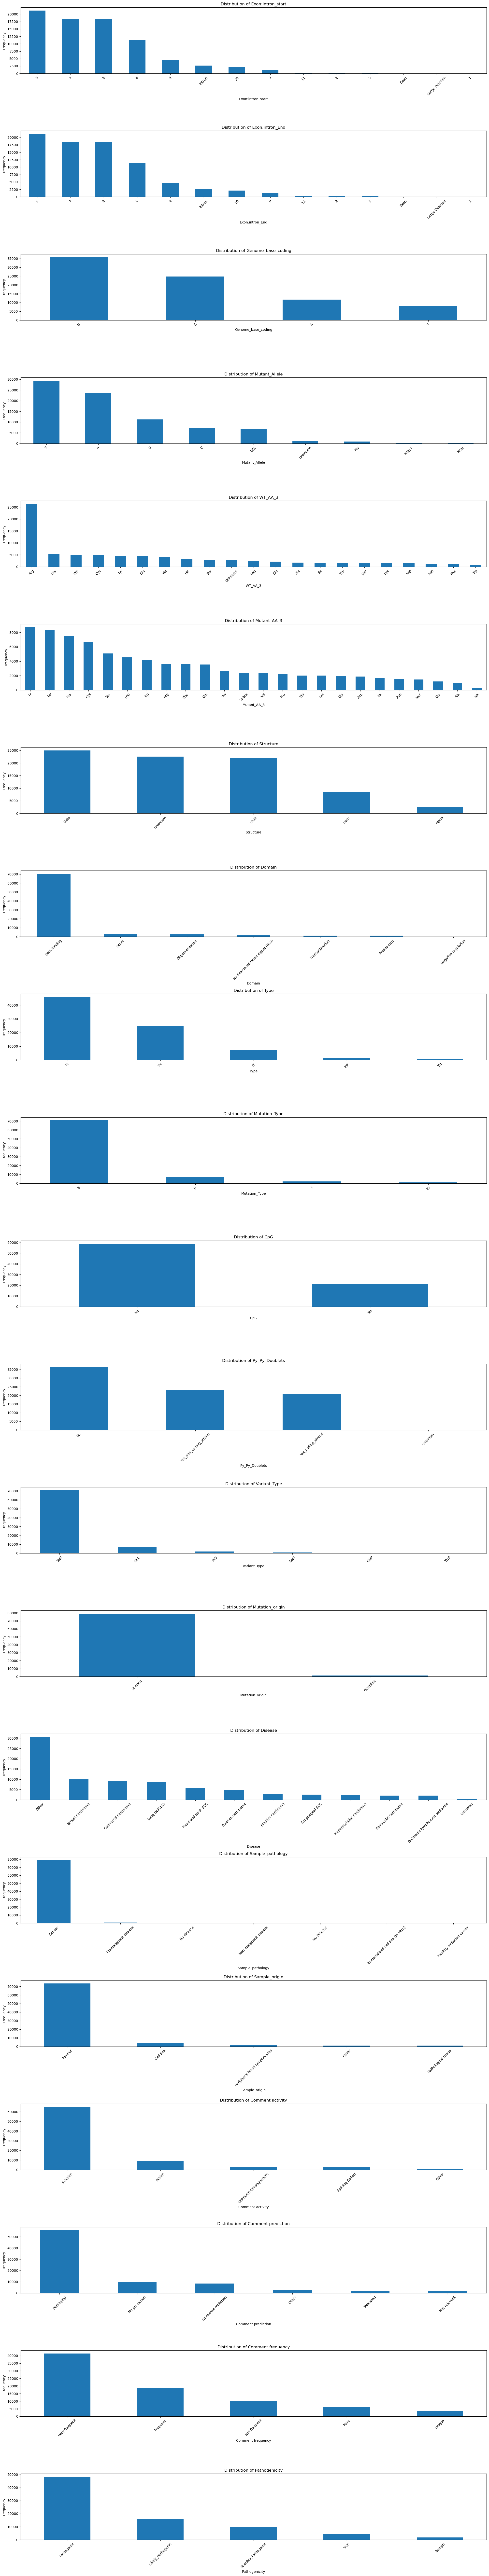

In [99]:
columns_to_plot = ['Exon:intron_start', 'Exon:intron_End',
                   'Genome_base_coding', 'Mutant_Allele', 
                   'WT_AA_3', 'Mutant_AA_3', 'Structure', 'Domain',  
                   'Type', 'Mutation_Type', 'CpG', 
                   'Py_Py_Doublets', 'Variant_Type', 
                   'Mutation_origin', 'Disease', 'Sample_pathology', 
                   'Sample_origin', 'Comment activity', 'Comment prediction', 
                   'Comment frequency', 'Pathogenicity']

num_rows = (len(columns_to_plot))  # Calculate the number of rows needed for subplots
fig, axes = plt.subplots(num_rows, 1, figsize=(20, num_rows * 5))

for i, col in enumerate(columns_to_plot):
    ax = axes.flatten()[i]
    value_counts = umd_mut_df[col].value_counts()
    value_counts.plot(kind='bar', ax=ax)  
    ax.set_title(f'Distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  
    
plt.tight_layout()
plt.show()


### Visualizing Categorical columns

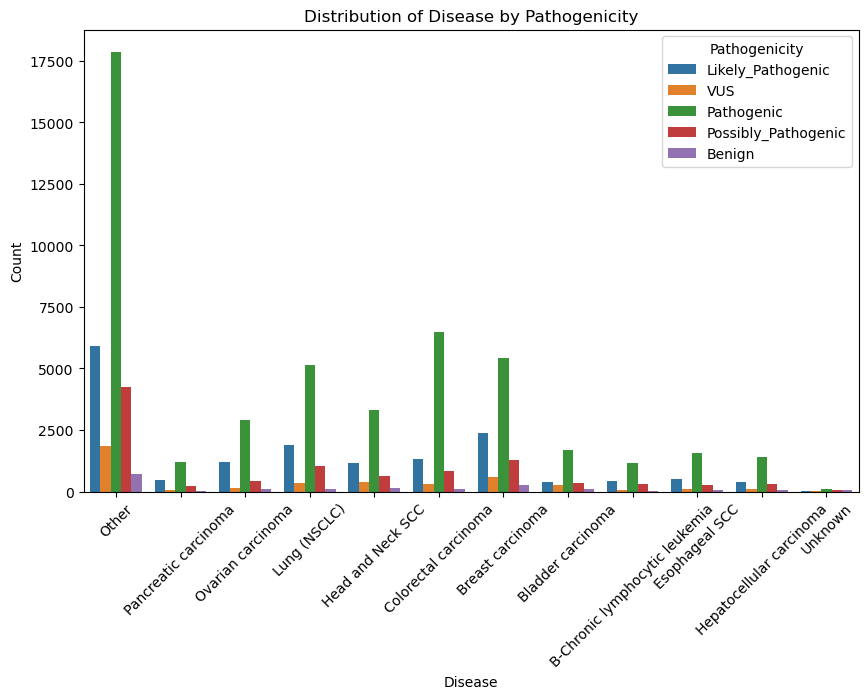

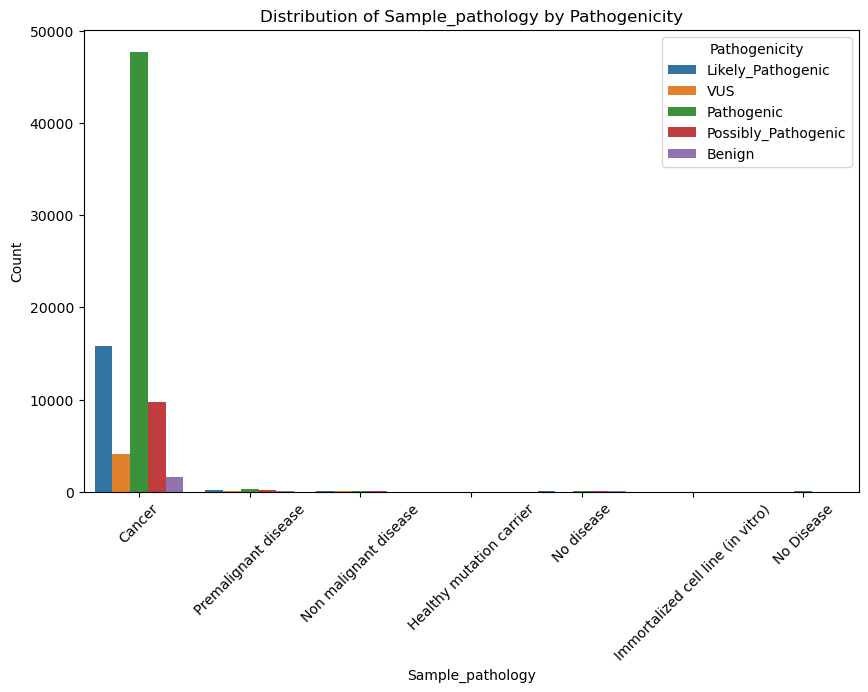

In [115]:
# Bar plot for categorical variables
def plot_categorical(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Pathogenicity', data=data)
    plt.title(f'Distribution of {column} by Pathogenicity')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Pathogenicity')
    plt.tight_layout()
    plt.show()

# Plotting categorical columns
categorical_columns = ['Disease', 'Sample_pathology']
for column in categorical_columns:
    plot_categorical(umd_mut_df, column)


### Visualizing Binary Columns

<Figure size 1000x600 with 0 Axes>

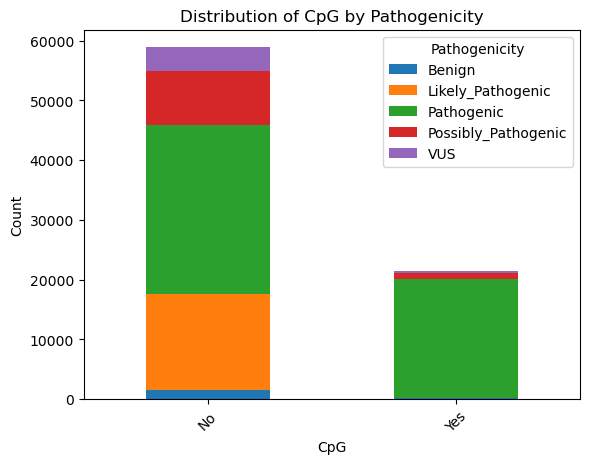

<Figure size 1000x600 with 0 Axes>

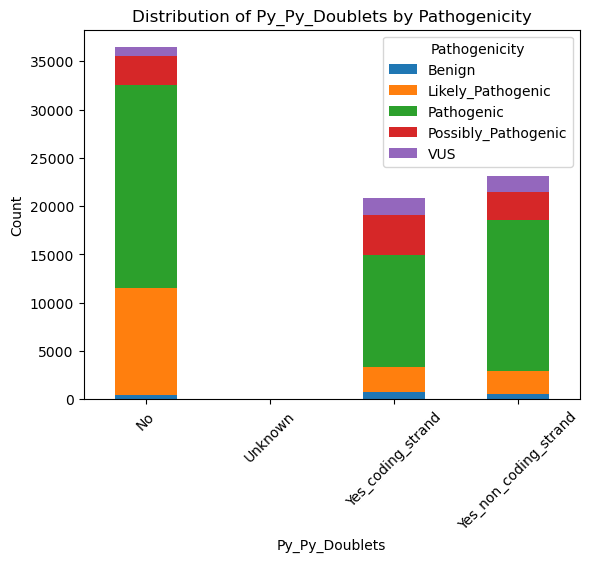

In [117]:
# Stacked bar plot for binary variables
def plot_binary(data, column):
    plt.figure(figsize=(10, 6))
    pd.crosstab(data[column], data['Pathogenicity']).plot(kind='bar', stacked=True)
    plt.title(f'Distribution of {column} by Pathogenicity')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Pathogenicity')
    plt.tight_layout()
    plt.show()

# Plotting binary columns
binary_columns = ['CpG', 'Py_Py_Doublets']
for column in binary_columns:
    plot_binary(umd_mut_df, column)


### Visualizing Text Data

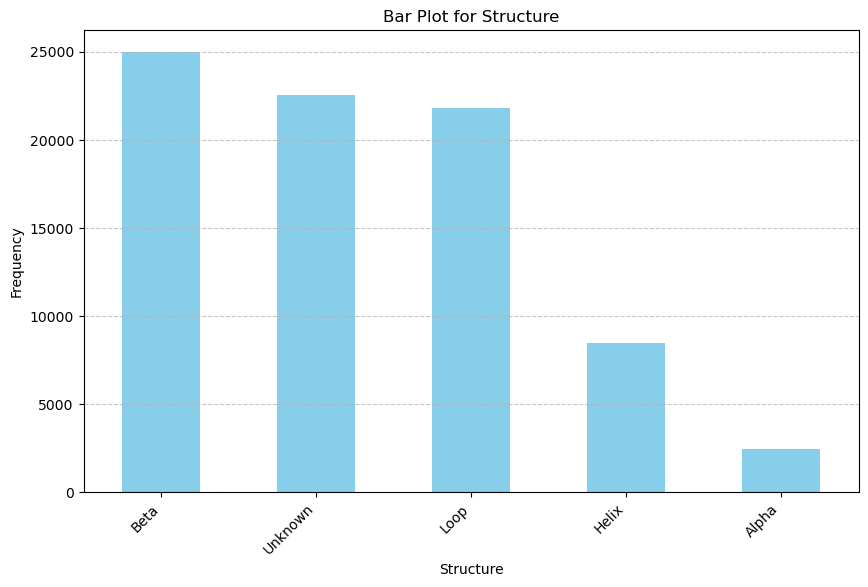

In [122]:
import matplotlib.pyplot as plt

def plot_barplot(data, column):
    # Count the frequency of each value in the column
    value_counts = data[column].value_counts()
    
    # Plot bar plot
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='skyblue')
    plt.title(f'Bar Plot for Variant Protein Structure')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot bar plot for 'Structure' column
plot_barplot(umd_mut_df, 'Structure')


### Visualizing Predicted Scores

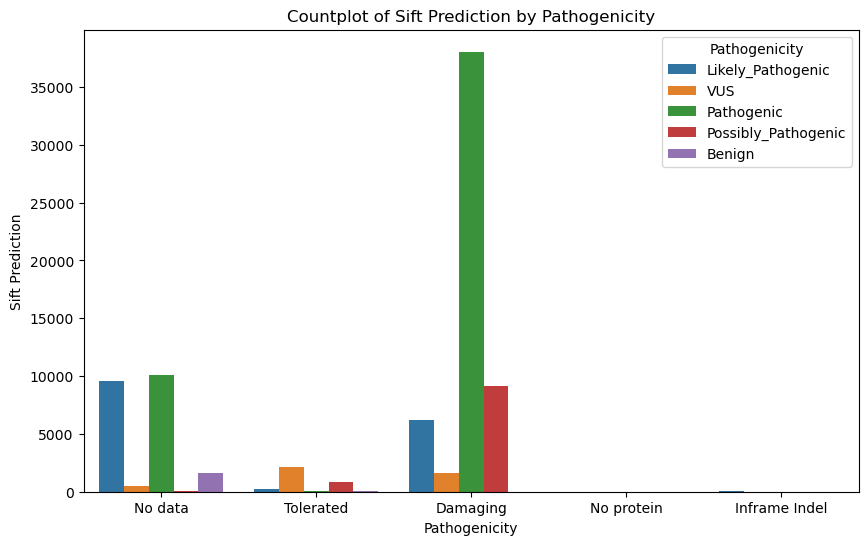

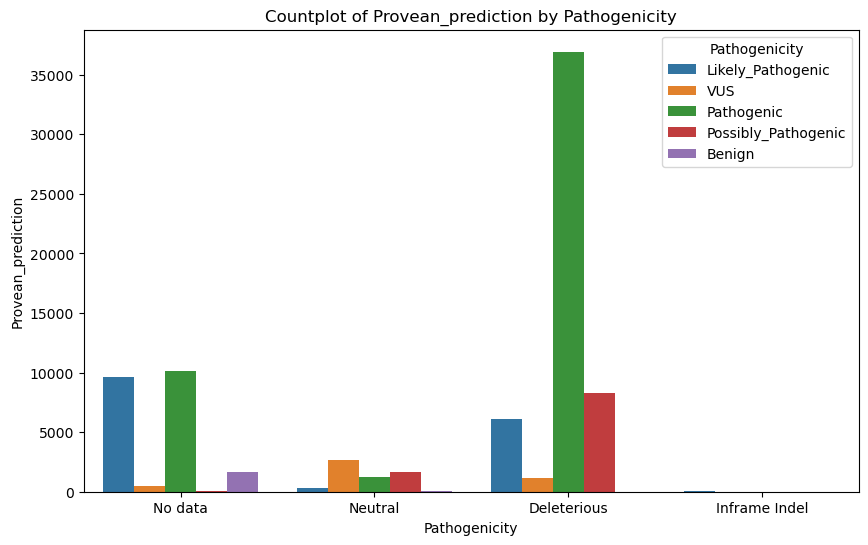

In [121]:
# Boxplot for predicted scores
def plot_predicted_scores(data, column):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Pathogenicity', data=data)
    plt.title(f'Countplot of {column} by Pathogenicity')
    plt.xlabel('Pathogenicity')
    plt.ylabel(column)
    plt.show()

# Plotting predicted scores
predicted_score_columns = ['Sift Prediction', 'Provean_prediction']
for column in predicted_score_columns:
    plot_predicted_scores(umd_mut_df, column)


### Visualizing the Class Imbalance in the target feature

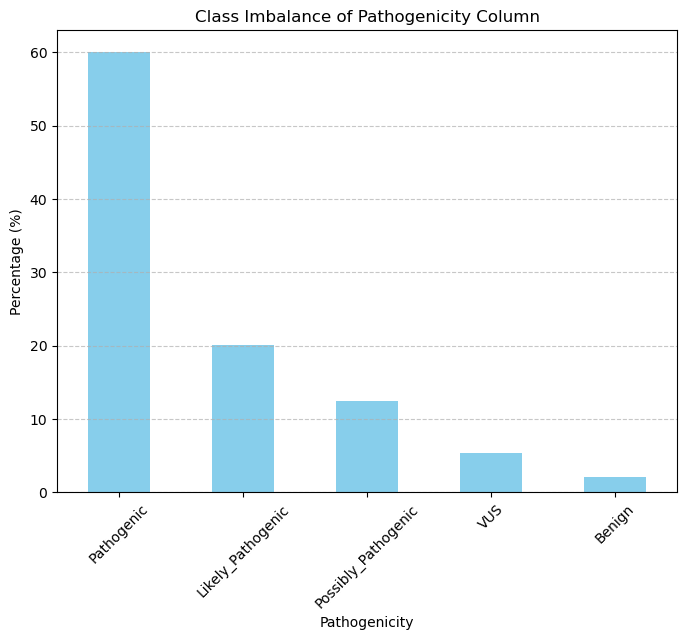

Pathogenicity
Pathogenic             60.052031
Likely_Pathogenic      20.034355
Possibly_Pathogenic    12.457523
VUS                     5.351208
Benign                  2.104883
Name: proportion, dtype: float64


In [100]:
# Calculate class imbalance
class_imbalance = umd_mut_df['Pathogenicity'].value_counts(normalize=True) * 100

# Plot class imbalance
plt.figure(figsize=(8, 6))
class_imbalance.plot(kind='bar', color='skyblue')
plt.title('Class Imbalance of Pathogenicity Column')
plt.xlabel('Pathogenicity')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print(class_imbalance)


In [101]:
object_columns = umd_mut_df.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Exon:intron_start', 'Exon:intron_End', 'Genome_base_coding',
       'Mutant_Allele', 'WT_AA_3', 'Mutant_AA_3', 'Wt_Codon', 'Mutant_Codon',
       'Structure', 'Domain', 'Type', 'Mutation_Type', 'CpG', 'Py_Py_Doublets',
       'Variant_Type', 'Mutation_origin', 'Disease', 'Sample_pathology',
       'Sample_origin', 'Comment activity', 'Comment prediction',
       'Comment frequency', 'Sift Prediction', 'Provean_prediction',
       'Mutassessor_prediction:', 'Prediction_Label', 'Pathogenicity'],
      dtype='object')


In [104]:
numeric_columns = umd_mut_df.select_dtypes(include='number').columns
print(numeric_columns)

Index(['HG38_Start', 'HG38_End', 'Codon', 'Base_Change_Size', 'Ins_Size',
       'Del_Size', 'Records_Number', 'Leukemia_Stat', 'Solid_Stat',
       'Tumor_Stat', 'Cell_line_Stat', 'Somatic_Stat', 'Germline_Stat',
       'Tumor_Repetition'],
      dtype='object')


## <a id= 'basemodel'></a>[Baseline Modeling](#TOC)

In [113]:
from sklearn.linear_model import LogisticRegression 

# Drop non-numeric columns
umd_mut_df_numeric = umd_mut_df.drop(columns=umd_mut_df.select_dtypes(exclude='number').columns)

# Assuming X contains your features and y contains your target variable 'Pathogenicity'
X = umd_mut_df_numeric
y = umd_mut_df['Pathogenicity']

# Split the data into training and testing sets
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X, y, test_size=0.2, random_state=42)

# instantiate a logistic regression
logit = LogisticRegression()

# fit the model to train set only
logit.fit(X_train_baseline, y_train_baseline)

# score the model accuracy scores and store in variables for display later
acc_train_baseline = logit.score(X_train_baseline, y_train_baseline)
acc_test_baseline = logit.score(X_test_baseline, y_test_baseline)

# scores
print(f"train accuracy: {acc_train_baseline}")
print(f"test accuracy: {acc_test_baseline}")

train accuracy: 0.7265400115141047
test accuracy: 0.7208115509086382


In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Drop non-numeric columns
umd_mut_df_numeric = umd_mut_df.drop(columns=umd_mut_df.select_dtypes(exclude='number').columns)

# Assuming X contains your features and y contains your target variable 'Pathogenicity'
X = umd_mut_df_numeric
y = umd_mut_df['Pathogenicity']

# Split the data into training and testing sets
X_train_baseline, X_test_baseline, y_train_baseline, y_test_baseline = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
clf = RandomForestClassifier()

# Train the classifier
clf.fit(X_train_baseline, y_train_baseline)

# Make predictions on the testing set
y_pred_baseline = clf.predict(X_test_baseline)

# Evaluate the model
test_accuracy = accuracy_score(y_test_baseline, y_pred_baseline)
print("Test Accuracy:", test_accuracy)


Accuracy: 0.9939009210853871


*----------------------------------------------------------------------------------*
## Applying Feature Engineering Techniques

### OHE : Non-numeric features